# Part 2 - House prices

Data cleaning
---
Your analysis should include the necessary data cleaning steps. For instance

- Find and handle incorrect, missing values
- Correct inconsistencies in the variables
- Handle outliers

You are free to choose your preferred approach to handle each step. For instance, you might want to replace missing values with the average or the most frequent value or create an missing category. In any case, justify your choices!

You can find a detailed description of each variable in the ``documentation.txt file``, but there are a few things to know.

- The ``Order`` and ``PID`` variables are identifiers. They are not useful to predict house prices.
- The variables are not necessarily encoded consistently. For instance, ``MS SubClass`` (the type of dwelling) and ``MS Zoning`` (zoning classification) are both categorical variables, but one is encoded with numerical values and the other with short labels.
- The data isn’t clean: there are incorrect and missing values, outliers and inconsistencies

You should address all these issues during the data cleaning stage.

In [1]:
# import libraries 
%matplotlib inline
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re

In [2]:
# load data train/test 
train_df = pd.read_csv("house-prices.csv")
test_df = pd.read_csv("house-prices-test.csv")

# Display the first 5 rows of data train
train_df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Bnk  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       4    2009       WD           Normal     236000  
1        0       6    2006       WD           Normal     155000  
2        0       1    2007       WD           Normal      75000  
3        0       4    2010       WD           Normal     165500  
4        0       1    2007       WD           Normal     122000  

[5 rows x 82 columns]

In [3]:
# Show size of the dataset
train_df.shape

(2430, 82)

In [4]:
# Count how many times each data type is present in the dataset
pd.value_counts(train_df.dtypes)

object     43
int64      28
float64    11
dtype: int64

In [5]:
# Check for duplicated values
train_df.duplicated().sum()

0

The ``Order`` and ``PID`` variables are identifiers. They are not useful to predict house prices. I will drop them

In [6]:
# Drop Order and PID variable 
train_df = train_df.drop(["Order", "PID"], axis=1)

### Investigate the percentage of missing values per feature. 

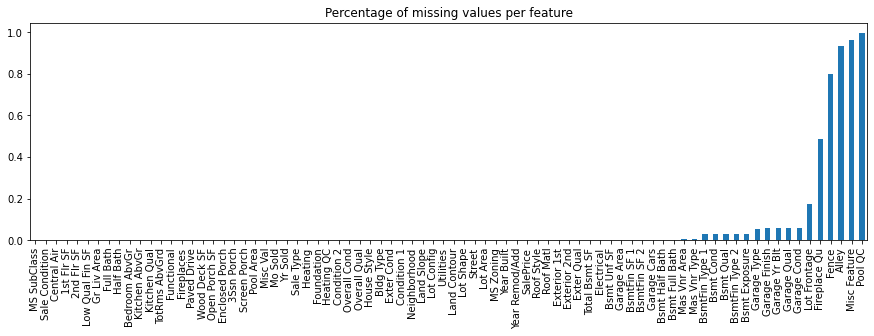

In [7]:
# Investigate the percentage of missing values per feature. 
train_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

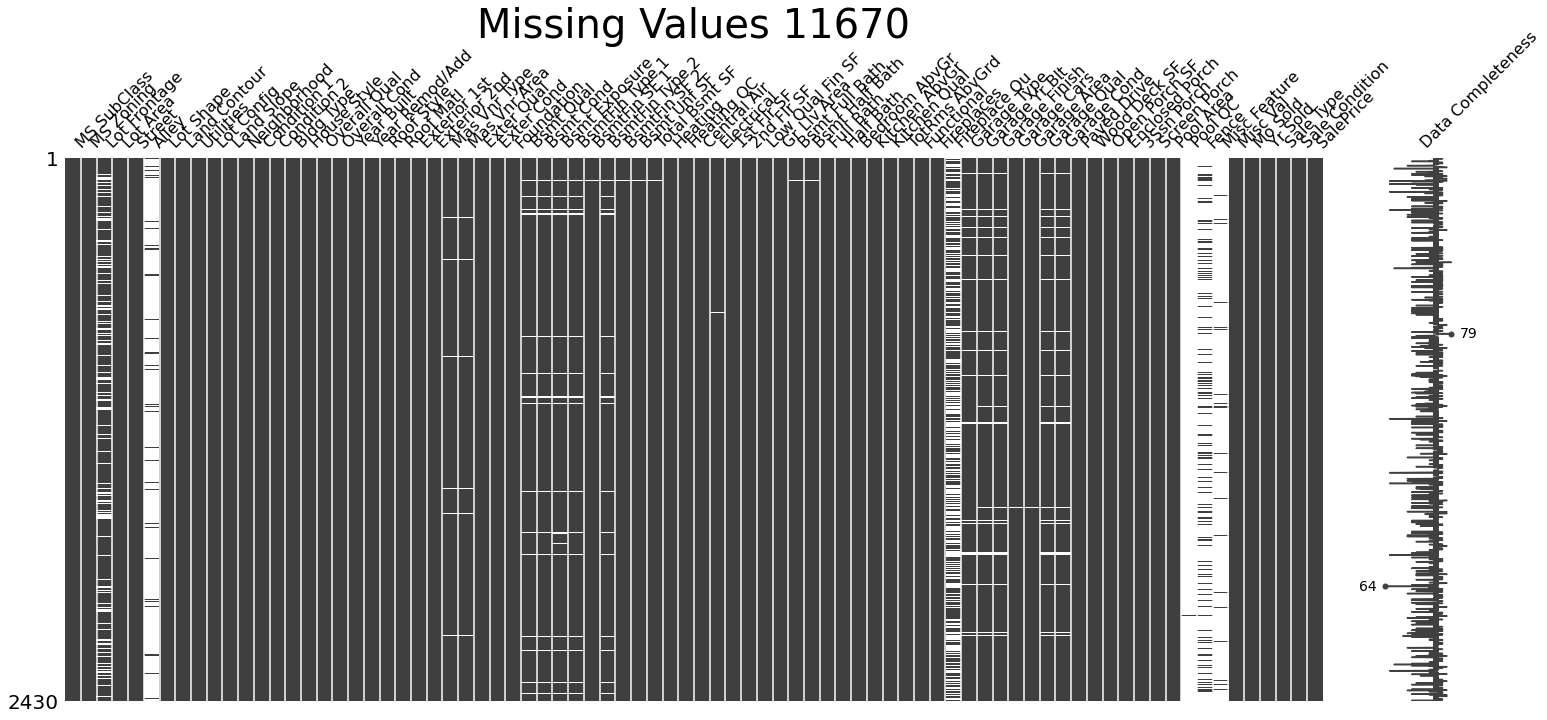

In [8]:
import missingno as msno
# Using msno.matrix() to see more details
msno.matrix(train_df, labels=True)
plt.title("Missing Values {}".format(train_df.isna().sum().sum()), fontsize=40)
plt.show()

We have 11670 missing values by checking the documentation we see 4 categories of variables nominal, ordinal, discrete and continuous. I will deal with missing values in each category separately. 

Steps:
1. Find the label that matches the variables and save them in a separate list.
2. Encode ordinal variable so I can deal with missing values and prepare the data for the modelling part.
3. I will check each category separately so I can deal with missing values by filling or dropping them.


In [9]:
# Search in the documentation the labels of each variable 

# Find the label that matches the variables 
def find_col_types(text):
    types = ["Nominal", "Ordinal", "Discrete",]
    pattern = r"(.*)\((Nominal|Ordinal|Discrete|Continuous)\):"
    matches = re.findall(pattern, text)
    # Save results in a dictionary 
    return {col.strip(): typ.strip() for col, typ in matches}

# Read txt file
with open('documentation.txt', 'r',  encoding='ISO-8859-1') as file:
    text = file.read()
    types = find_col_types(text)


In [10]:
# Save variables corresponding to the labels
col_normal = []

col_ordinal = []

col_discrete = []

col_continous = []

remove_items = {
    "Nominal": ['Exterior 1', 'Exterior 2', 'PID'],
    "Ordinal": ['HeatingQC', 'KitchenQual'],
    "Discrete": ['Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Order'],
    "Continuous": ['3-Ssn Porch']
}

col_types = {
    "Nominal": col_normal, 
    "Ordinal": col_ordinal, 
    "Discrete": col_discrete, 
    "Continuous": col_continous}


# Save labels in dictionary
for col, value in types.items():
    for type_name, columns in col_types.items():
        if value == type_name:
            columns.append(col)


# Remove column not find in the data
for type_name, columns in col_types.items():
    items_remove = remove_items.get(type_name)
    # Check if items
    if items_remove:
        for item in items_remove:
            # Check if item is in columns
            if item in columns:
                columns.remove(item)

# Adding a space to "BsmtFinType 2" and "FireplaceQu"
col_ordinal = list(map(lambda col: col.replace("BsmtFinType 2", "BsmtFin Type 2").replace("FireplaceQu", "Fireplace Qu"), col_ordinal))


for type_name, columns in col_types.items():
    print(f"{type_name} columns: {len(columns)}")

Nominal columns: 21
Ordinal columns: 20
Discrete columns: 11
Continuous columns: 18


In [11]:
len(col_normal) + len(col_ordinal) + len(col_discrete) + len(col_continous)

70

# plot to check 
https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas


# check this like below!
https://www.python-graph-gallery.com
https://www.data-to-viz.com/


try to use barh plot for non numercal values by counting them
try to plot the data to have a over view of the data


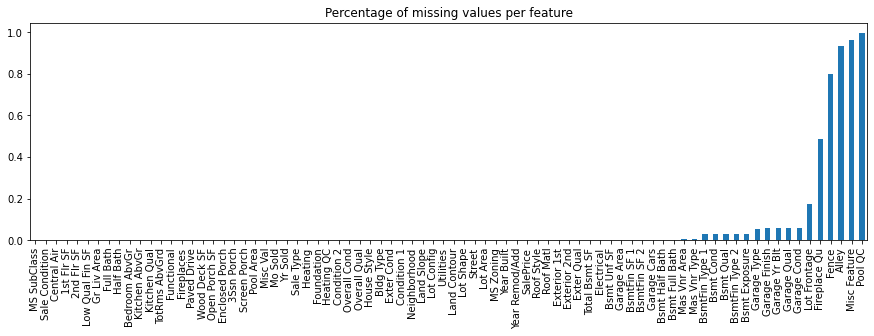

In [12]:
# Investigate the percentage of missing values per feature. 
train_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

In [13]:
# Check a Ordinal feature
train_df["Garage Cond"].value_counts(dropna=False)

TA     2202
NaN     138
Fa       61
Po       14
Gd       13
Ex        2
Name: Garage Cond, dtype: int64

We see that ``NaN`` values as a mining in this case Na is for Garage Cond 

Decision: 
---
First I will encode the ordinal so I can fill NaN values that could occur. 

Encoding all Ordinal variables by defining a numerical scale 1 to 5. 
This way, the machine-learning algorithm will have a sense of the relative distances between the categories, which can be useful information.

And Using One_hot encoding for norminal values. 

In [14]:
# Encoding scale 
encoding_Lot_Shape = {"Reg" : 4, "IR1" : 3, "IR2" : 2, "IR3" : 1}

encoding_Utilities =  {"AllPub" : 4, "NoSewr" : 3, "NoSeWa" : 2, "ELO" : 1}	
	
encoding_Land_Slope = {"Gtl" : 3, "Mod" : 2, "Sev" : 1}

encoding_Bsmt_Exposure = {"Gd" : 5, "Av" : 4, "Mn" : 3, "No" : 2, np.nan : 0}

# Note: BsmtFinType1 and BsmtFinType2 have the same scale
encoding_BsmtFinType1 = {
    "GLQ" :	6,
    "ALQ" :	5,
    "BLQ" : 4,
    "Rec" :	3,
    "LwQ" :	2,
    "Unf" :	1,
    np.nan : 0
}


encoding_Electrical = { 
    "SBrkr" : 5,
    "FuseA" : 4,	
    "FuseF"	: 3,
    "FuseP"	: 2,
    "Mix" : 1,
    np.nan : 0
}


encoding_Functional = {
    "Typ" : 8,
    "Min1" : 7,
    "Min2" : 6,
    "Mod" : 5,
    "Maj1" : 4,
    "Maj2" : 3,
    "Sev" : 2,
    "Sal" :	1
}

encoding_Fireplace_Qu = {
    "Ex" : 5,
    "Gd" : 4,
    "TA" : 3,
    "Fa" : 2,
    "Po" : 1,
    np.nan : 0

}

encoding_Paved_Drive = {"Y" : 3, "P" : 2, "N" : 1}

encoding_Fence = {"GdPrv" : 5, "MnPrv" : 4, "GdWo" : 3, "MnWw" : 2,	np.nan : 0}

encoding_other = {np.nan : 0,"Po" : 1, "Fa" : 2,"TA" : 3,"Gd" : 4,"Ex" : 5}

ordinal_encoding = {
    "Lot Shape" : encoding_Lot_Shape,
    "Utilities" : encoding_Utilities,
    "Land Slope" : encoding_Land_Slope,
    "Overall Qual" : None,
    "Overall Cond" : None,
    "Bsmt Exposure" : encoding_Bsmt_Exposure,
    "BsmtFin Type 1" : encoding_BsmtFinType1,
    "BsmtFin Type 2" : encoding_BsmtFinType1,
    "Electrical" : encoding_Electrical,
    "Fireplace Qu": encoding_Fireplace_Qu,
    "Functional" : encoding_Functional,
    "Paved Drive" : encoding_Paved_Drive,
    "Fence" : encoding_Fence,
    
}


# Encoding ordinal values by numbers
for col in col_ordinal:
    col_encoding = ordinal_encoding.setdefault(col, encoding_other)
    if col_encoding == None:
        continue
    train_df[col] = train_df[col].map(col_encoding)



# Display the change 
train_df[col_ordinal].head()

Lot Shape  Utilities  Land Slope  Overall Qual  Overall Cond  Exter Qual  \
0          3          4           3             7             5           4   
1          4          4           3             6             6           3   
2          4          4           3             4             5           3   
3          3          4           3             5             5           3   
4          3          4           3             7             4           2   

   Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
0           3          4          3              2               6   
1           3          3          3              2               1   
2           3          3          3              2               1   
3           3          3          3              2               3   
4           3          3          3              2               1   

   BsmtFin Type 2  Electrical  Functional  Fireplace Qu  Garage Qual  \
0               1           5           8             3            3   
1               1           5           8             4            3   
2               1           5           8             0            3   
3               1           5           8             4            3   
4               1           3           8             4            3   

   Garage Cond  Paved Drive  Pool QC  Fence  
0            3            3        0      0  
1            3            3        0      0  
2            3            3        0      0  
3            3            3        0      0  
4            3            1        0      4

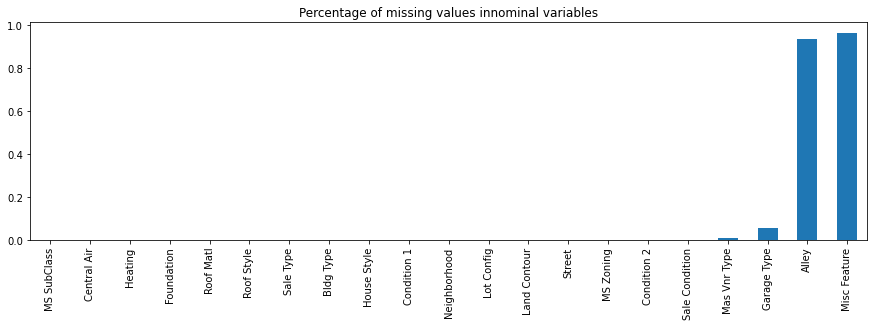

In [15]:
# Investigate the percentage of missing values for nominal variables
train_df[col_normal].isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values innominal variables");

In [16]:
# Display detail of the percentage 
col_normal_with_missing = ["Alley", "Mas Vnr Type", "Garage Type", "Misc Feature"]
train_df[col_normal_with_missing].isna().mean()

Alley           0.932922
Mas Vnr Type    0.008230
Garage Type     0.055967
Misc Feature    0.962963
dtype: float64

Columns with nominal variables NaN values will be fill  by they corresponding mining 

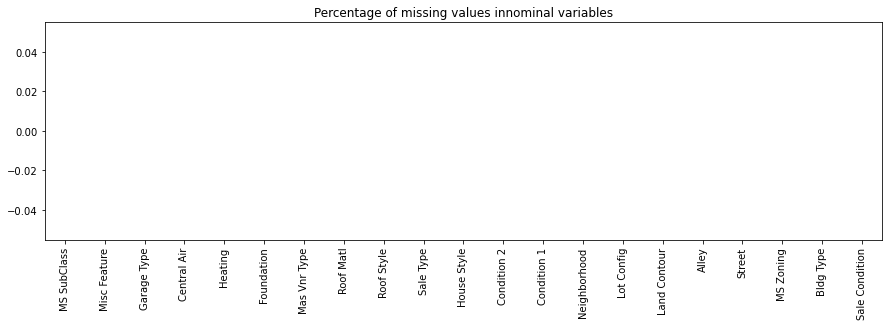

In [17]:
fill_nan = {
    "Alley": "No alley access",
    "Mas Vnr Type": "None",
    "Garage Type": "Garage Type",
    "Misc Feature" : "None"
}

# Fill NaN values by they corresponding mining 
for col in fill_nan:
    train_df[col] = train_df[col].fillna(fill_nan.get(col))

# Display change 
train_df[col_normal].isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values innominal variables");

### Investigate the percentage of missing values for nominal variables

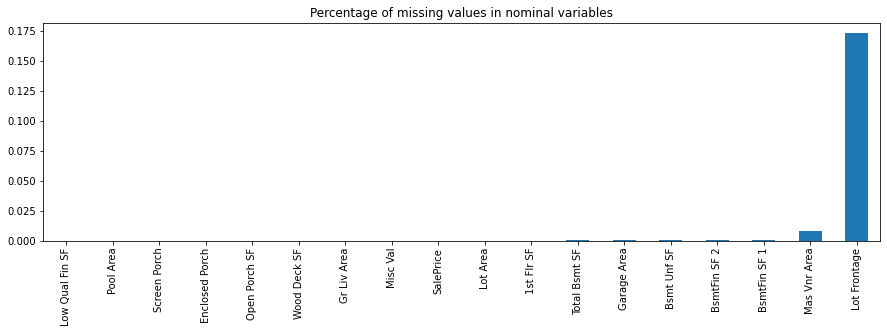

In [18]:
# Investigate the percentage of missing values for nominal variables
train_df[col_continous].isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values in nominal variables");

We see a small percentage of missing values and to ovoid introduce bias and uncertainty I will drop NaN values.

In [19]:
# Prop NaN values
col_continous_with_missing = ["Lot Frontage", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Garage Area"]
train_df = train_df.dropna(subset=col_continous_with_missing)

# Display the change 
train_df[col_continous].isna().sum()

Lot Frontage       0
Lot Area           0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

### Investigate the percentage of missing values for discrete variables

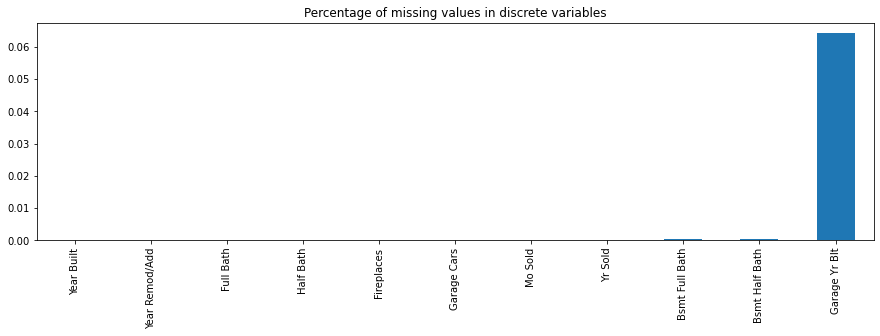

In [20]:
# Investigate the percentage of missing values for discrete variables
train_df[col_discrete].isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values in discrete variables");

We see that ``Garage Yr Blt`` has the most missing values with only 6%.   It's a small percentage of missing values so I will drop them. 

In [21]:
# Drop NaN in discrete variables
col_drop = ["Bsmt Full Bath", "Bsmt Half Bath", "Garage Yr Blt"]
train_df = train_df.dropna(subset=col_drop)


# Display change
train_df[col_discrete].isna().mean()


Year Built        0.0
Year Remod/Add    0.0
Bsmt Full Bath    0.0
Bsmt Half Bath    0.0
Full Bath         0.0
Half Bath         0.0
Fireplaces        0.0
Garage Yr Blt     0.0
Garage Cars       0.0
Mo Sold           0.0
Yr Sold           0.0
dtype: float64

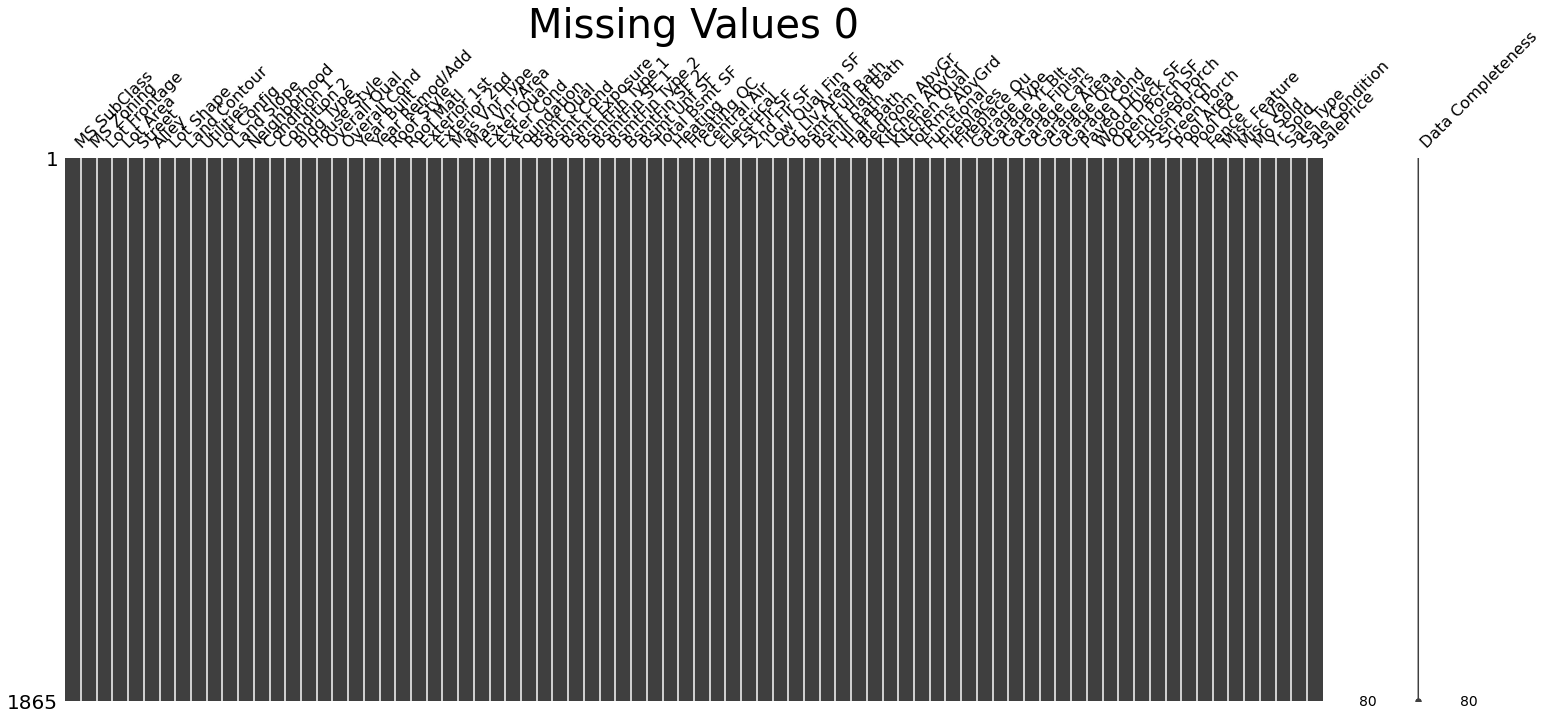

In [22]:
# Check missing values 
msno.matrix(train_df, labels=True)
plt.title("Missing Values {}".format(train_df.isna().sum().sum()), fontsize=40)
plt.show()

In [23]:
# Check normalize  Street in percentage ! 
train_df["Street"].value_counts(normalize=True)

Pave    0.996247
Grvl    0.003753
Name: Street, dtype: float64

In [24]:
""" Can be useful  """
train_df.interpolate() 

MS SubClass MS Zoning  Lot Frontage  Lot Area Street            Alley  \
1              20        RL          75.0     10170   Pave  No alley access   
2             160        RM          21.0      2001   Pave  No alley access   
3              20        RL          70.0     10552   Pave  No alley access   
4             190        RM          60.0     10120   Pave  No alley access   
5              50        RL          45.0      7506   Pave  No alley access   
...           ...       ...           ...       ...    ...              ...   
2424           60        RL          62.0      8857   Pave  No alley access   
2426           20        RL          82.0     12464   Pave  No alley access   
2427           60        RL          80.0     11584   Pave  No alley access   
2428           80        RL          85.0     13400   Pave  No alley access   
2429           20        RL          75.0      9375   Pave  No alley access   

      Lot Shape Land Contour  Utilities Lot Config  ...  Pool Area Pool QC  \
1             4          Lvl          4     Corner  ...          0       0   
2             4          Lvl          4     Inside  ...          0       0   
3             3          Lvl          4     Inside  ...          0       0   
4             3          Bnk          4     Inside  ...          0       0   
5             4          Lvl          4     Corner  ...          0       0   
...         ...          ...        ...        ...  ...        ...     ...   
2424          3          Lvl          4     Inside  ...          0       0   
2426          2          Low          4     Corner  ...          0       0   
2427          4          Lvl          4     Inside  ...          0       0   
2428          4          Lvl          4     Inside  ...          0       0   
2429          4          Lvl          4     Corner  ...          0       0   

     Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1        0         None        0       6     2006        WD           Normal   
2        0         None        0       1     2007        WD           Normal   
3        0         None        0       4     2010        WD           Normal   
4        4         None        0       1     2007        WD           Normal   
5        0         None        0       5     2008        WD           Normal   
...    ...          ...      ...     ...      ...        ...             ...   
2424     0         None        0       3     2007        New         Partial   
2426     5         None        0      11     2009        WD           Normal   
2427     0         None        0      11     2007        WD           Normal   
2428     3         None        0       6     2006        WD           Normal   
2429     0         None        0       6     2006        WD           Normal   

      SalePrice  
1        155000  
2         75000  
3        165500  
4        122000  
5        114000  
...         ...  
2424     171925  
2426     152000  
2427     197000  
2428     159950  
2429     146000  

[1865 rows x 80 columns]

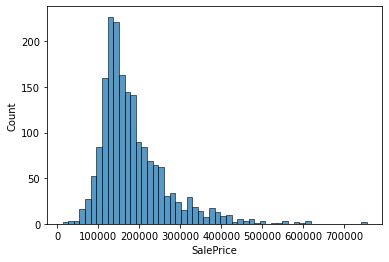

In [25]:
# Plot the count of unique values 
sns.histplot(x="SalePrice", data=train_df);

# Investigate how many unique numerical values each feature.

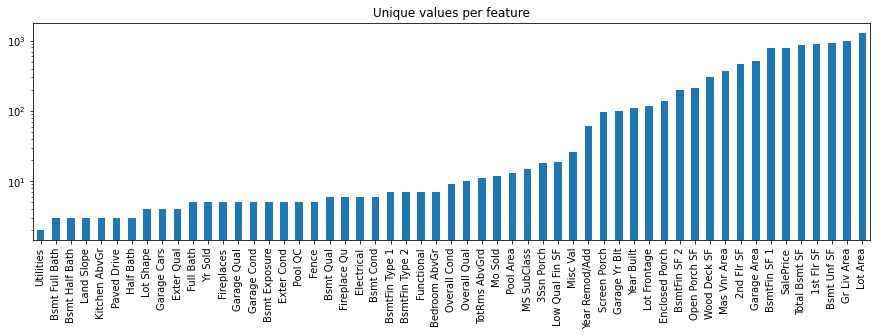

In [26]:
# Investigate how many unique numerical values each feature has. 
unique_values = train_df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")
plt.show()

In [27]:
# Extract number of unique values per non-numerical feature
df_non_numerical = train_df.select_dtypes(exclude="number")
# Dispply the first 20 entires
df_non_numerical.nunique()[:20]

MS Zoning        7
Street           2
Alley            3
Land Contour     4
Lot Config       5
Neighborhood    26
Condition 1      9
Condition 2      6
Bldg Type        5
House Style      8
Roof Style       6
Roof Matl        6
Exterior 1st    14
Exterior 2nd    15
Mas Vnr Type     5
Foundation       6
Heating          5
Heating QC       5
Central Air      2
Kitchen Qual     5
dtype: int64

Investigate how many unique values each of these non-numerical features contains

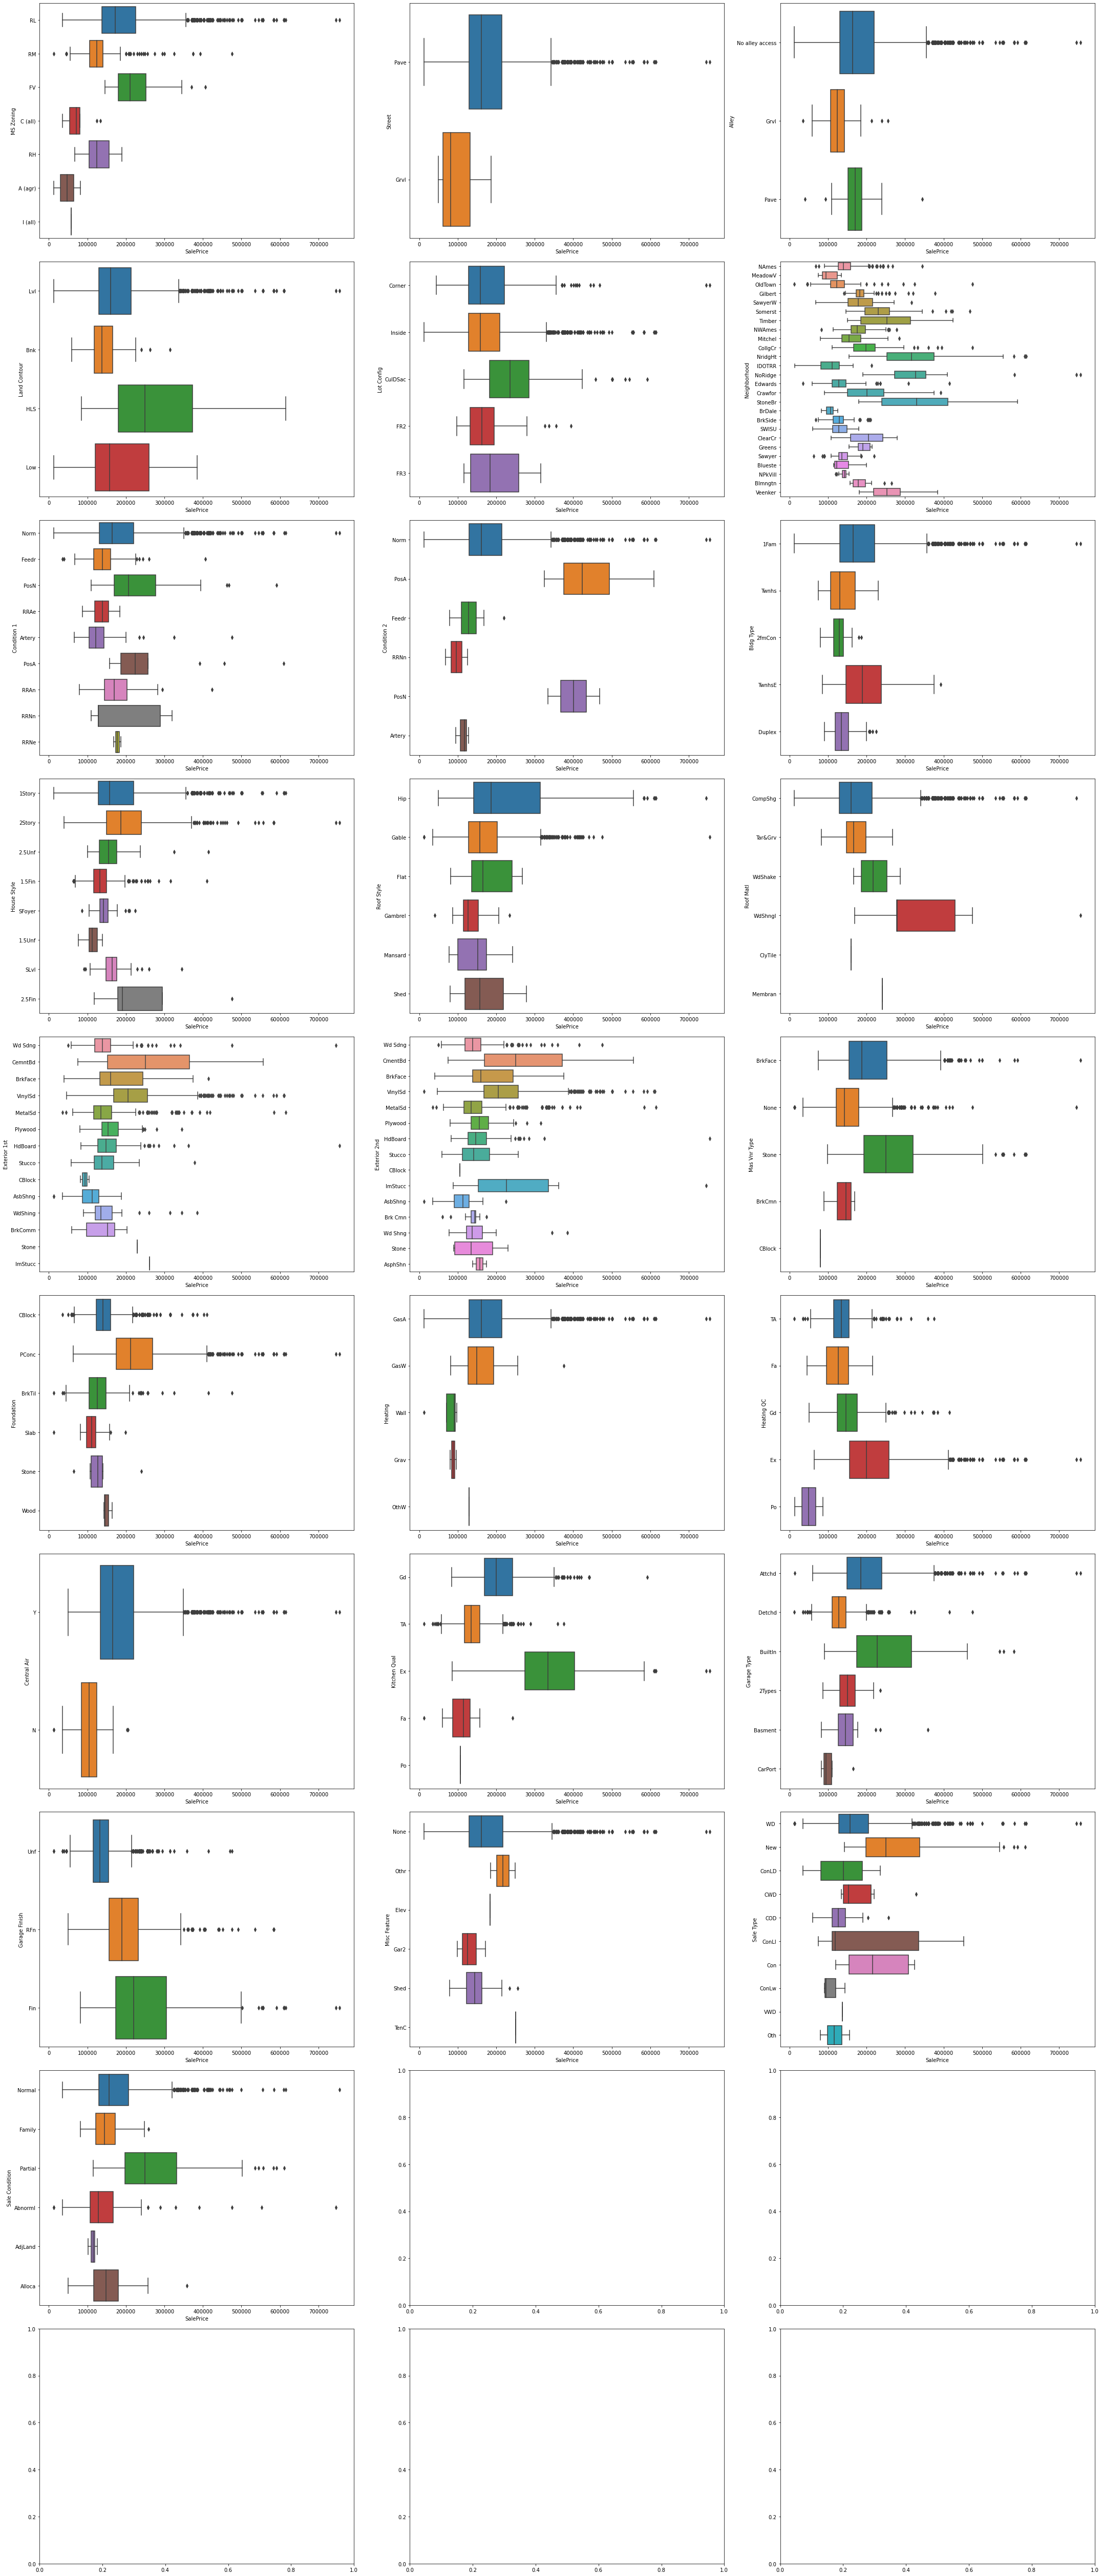

In [33]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=3, nrows=10, figsize=(30, 70))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    sns.boxplot(data=train_df, y=col, x="SalePrice",  ax=ax)
    
plt.tight_layout()
plt.show()

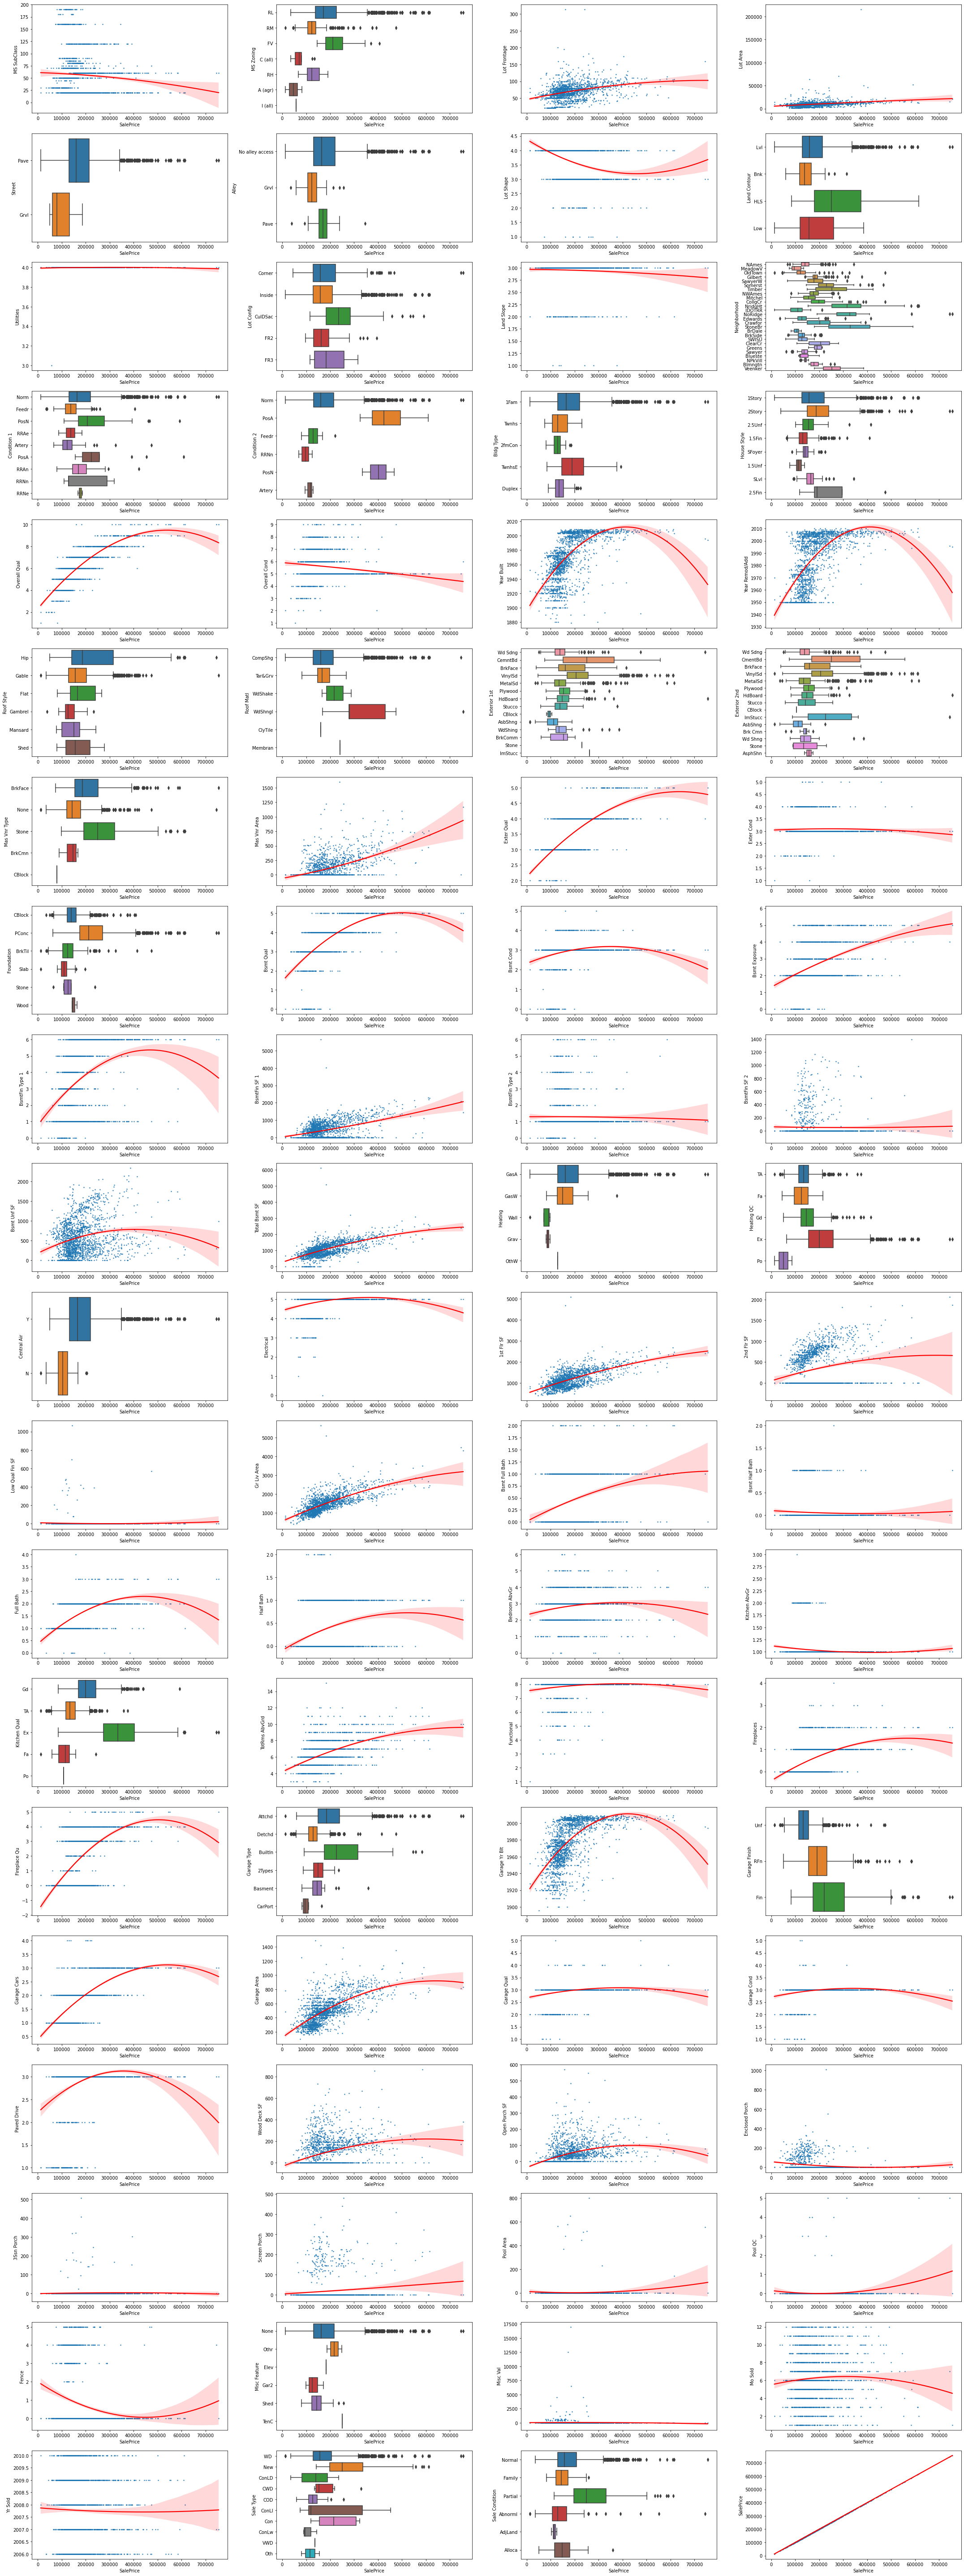

In [32]:
# Plot all the data
fig, axes = plt.subplots(round(len(train_df.columns)/4), 4, figsize=(30, 80))

for col, ax in zip(train_df.columns, axes.ravel()):
    if train_df[col].dtype in [np.int64, np.float64]:   # change degree 
        sns.regplot(data=train_df, x="SalePrice", y=col, order=2, marker='.', scatter_kws={"s": 10}, line_kws={"color": "red"}, ax=ax, dropna=True)
    else:
        # sns.barplot() will show the average value of the target variable for each category in the non-numerical column.
        sns.boxplot(data=train_df, y=col, x="SalePrice",  ax=ax)

plt.tight_layout()
plt.show()

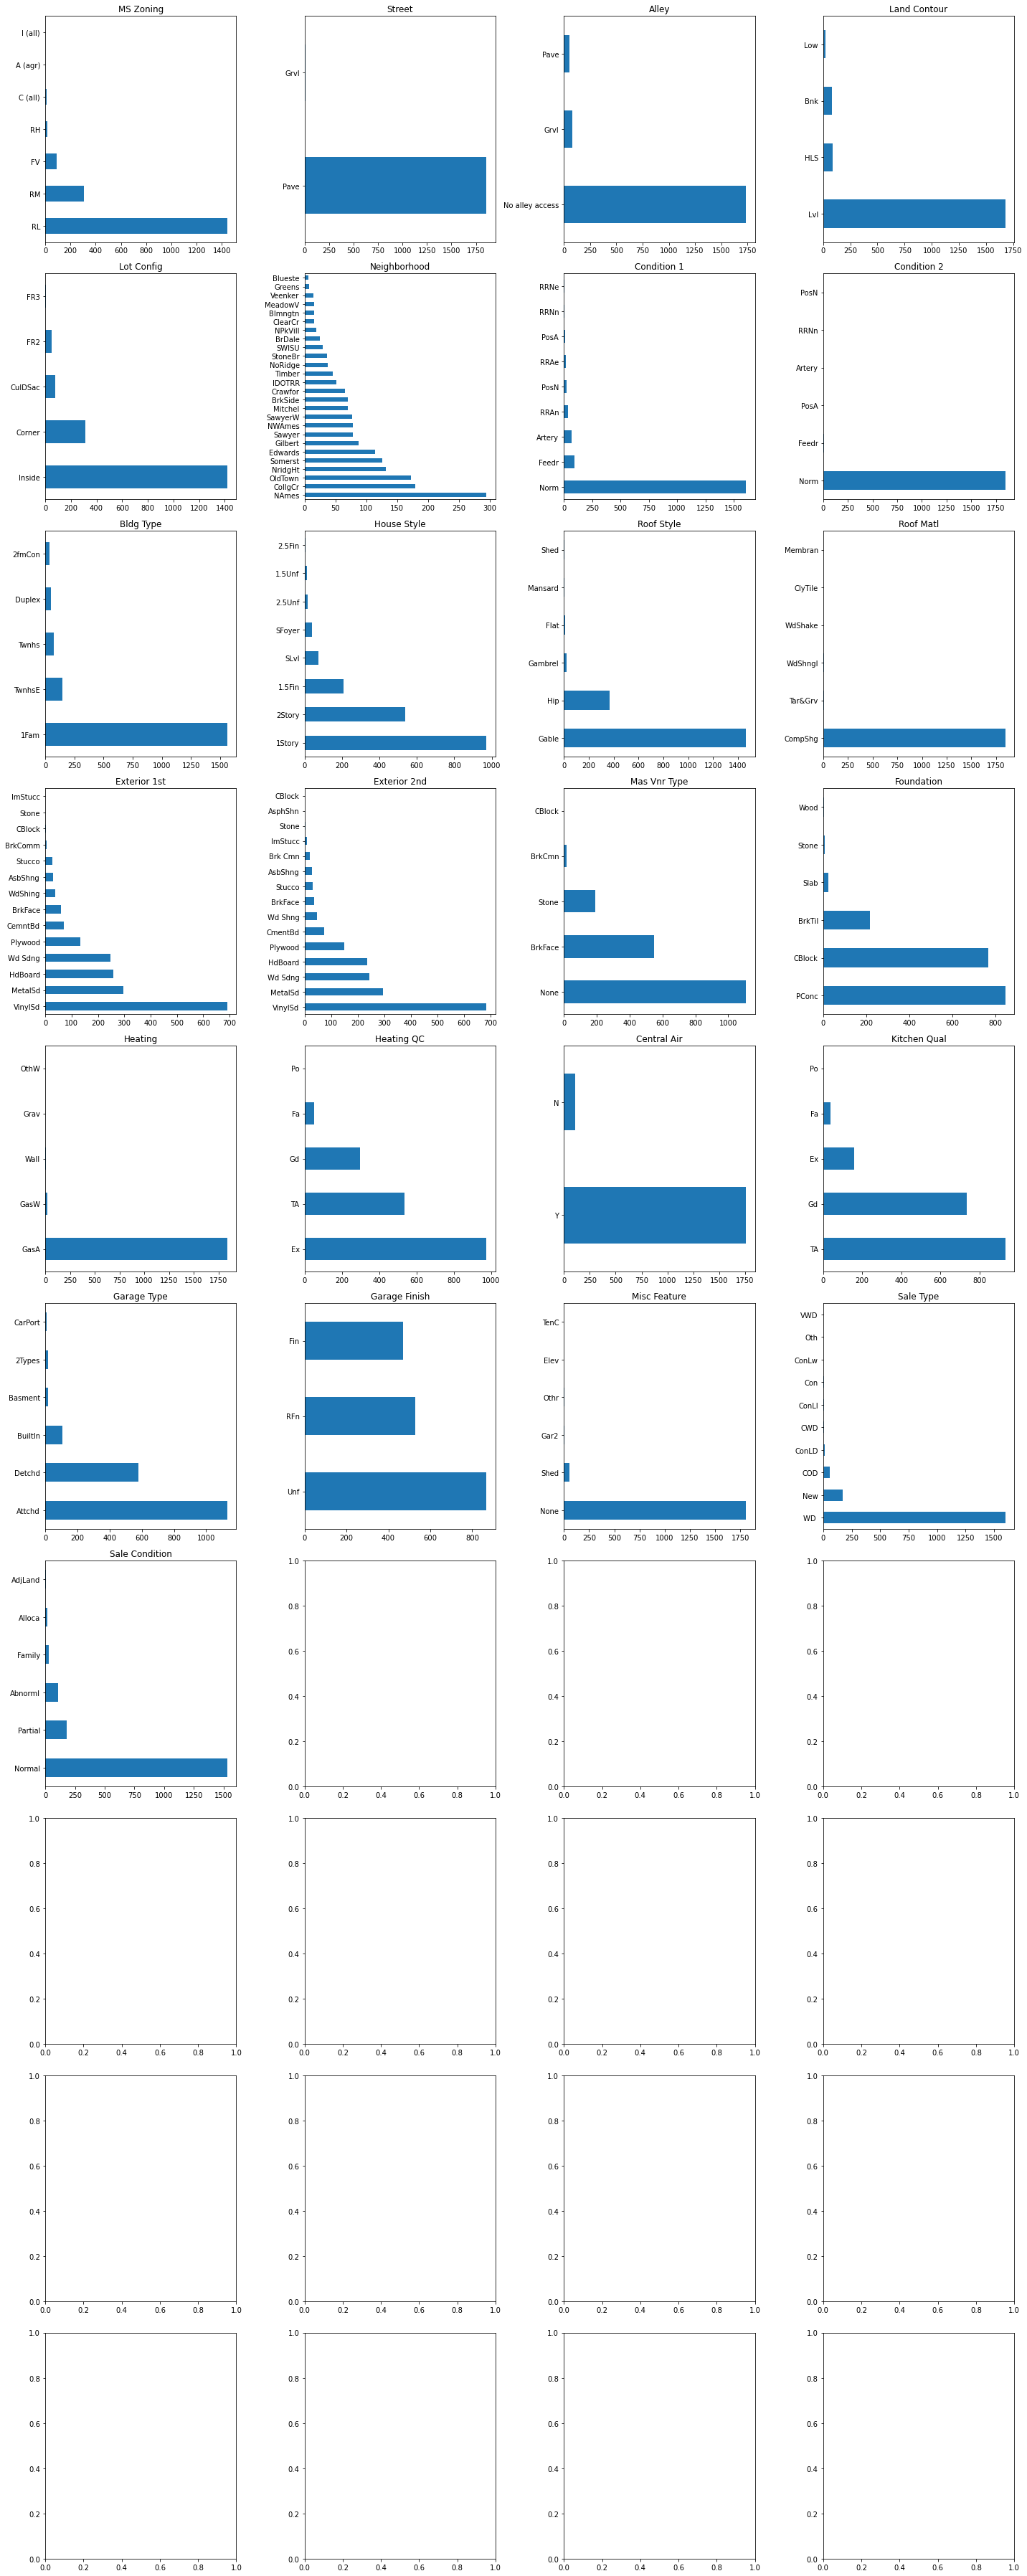

In [30]:
""" # Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=4, nrows=10, figsize=(20, 50))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot.barh(title=col, ax=ax)
    
plt.tight_layout()
plt.show() """

In [31]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# To read 

Coding nominal variables for use in machine learning algorithms is often referred to as "encoding". There are several methods for encoding nominal variables, including:

1. One-hot encoding: This method creates a new binary column for each unique category in a nominal variable. For example, if a nominal variable has three categories (A, B, C), three new binary columns will be created. Each row will have a 1 in the column corresponding to its category and 0s in all other columns. This method works well when there are few categories in the nominal variable, but can result in a large number of new columns when there are many categories.

2. Ordinal encoding: This method assigns a numerical value to each category in a nominal variable based on its order or ranking. For example, if a nominal variable has three categories (A, B, C), they could be assigned the values 1, 2, 3 respectively. This method assumes that the categories have a natural ordering, and that the difference between the values is meaningful.

3. Dummy encoding: This method is similar to one-hot encoding, but avoids the issue of high-dimensional data by only creating k-1 columns for k categories. One column is dropped to avoid the issue of perfect multicollinearity, where two or more columns are highly correlated.

4. Target encoding: This method replaces the categories of a nominal variable with the mean of the target variable for each category. For example, if the target variable is a binary classification outcome, the mean of the target variable could be the probability of being in the positive class. This method requires careful tuning to avoid overfitting and should be used with cross-validation.

The appropriate encoding method will depend on the nature of the data and the requirements of the machine learning algorithm. For example, decision trees and random forests can handle categorical data without any encoding, while linear and logistic regression require encoding of nominal variables.





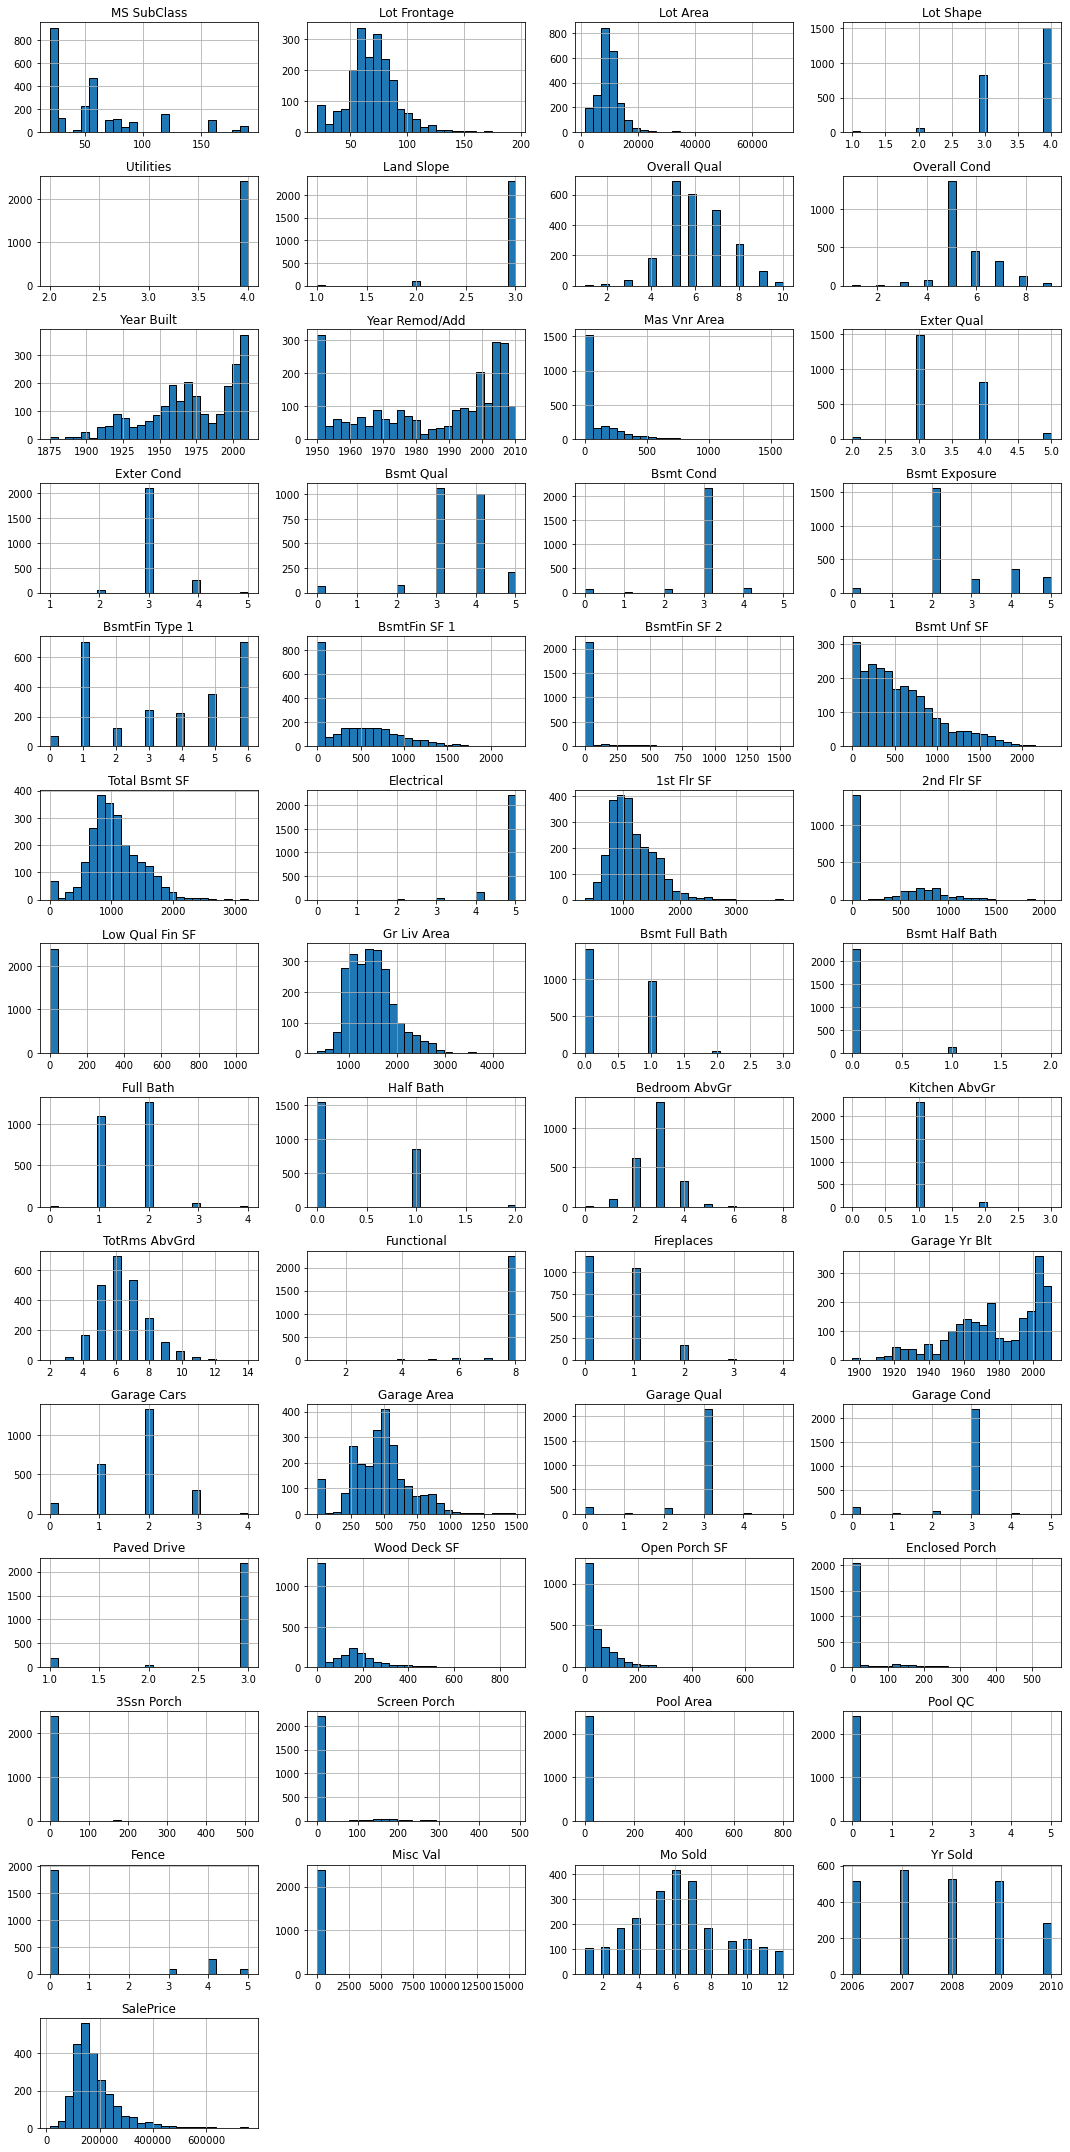

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
train_df.hist(bins=25, figsize=(15, 30), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

In [ ]:
train_df["Condition 2"]

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
2425    Norm
2426    Norm
2427    Norm
2428    Norm
2429    Norm
Name: Condition 2, Length: 2430, dtype: object

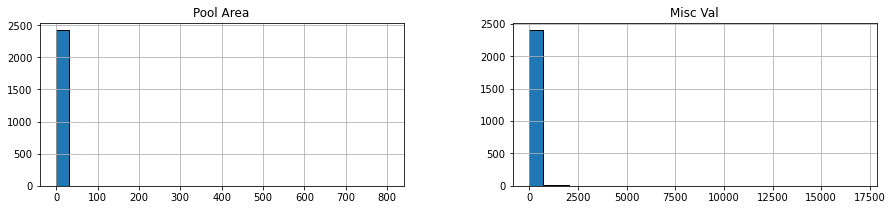

In [ ]:
# Plot a simple of all the numerical feature 
train_df[["Pool Area", "Misc Val"]].hist(bins=25, figsize=(15, 3), layout=(-1, 2), edgecolor="black");

Using the ``.mode()`` function, we can extract for each feature the most frequent entry.

In [ ]:
train_df[["Pool Area", "Misc Val"]].mode() # most frequent entry is zero (0)

Pool Area  Misc Val
0          0         0

The code below calculates the most frequent entry (mode) of each feature in a dataframe "train_df". Then, it creates a new dataframe "df_freq" where each row is marked as "True" if it contains the most frequent entry, and "False" otherwise.

Finally, the mean of the "True" values is calculated for each feature and sorted in descending order. 

The result, the 5 top features with the highest ratio of singular value.

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = train_df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = train_df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
df_freq.head()

Utilities      0.998765
Street         0.995473
Pool Area      0.995062
Condition 2    0.988889
3Ssn Porch     0.988066
dtype: float64

In [ ]:
all_zero = train_df.eq(0).all()
all_zero.

False

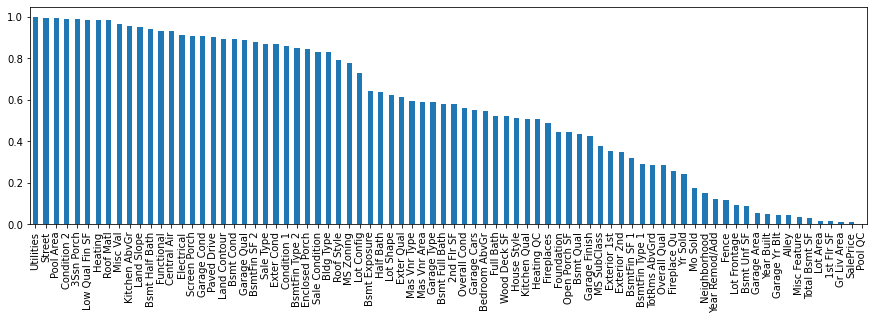

In [ ]:
# taking a look a the ratio of each faetures
df_freq.plot.bar(figsize=(15, 4));

In [ ]:
""" to do """

In [ ]:
# to do!
""" Check EDA part 3  """

- The variables are not necessarily encoded consistently. For instance, MS SubClass (the type of dwelling) and MS Zoning (zoning classification) are both categorical variables, but one is encoded with numerical values and the other with short labels.

Change MS SubClass type to ``str`` to enable the function ``pd.get_dummies`` to work in this categorical variable.

In [ ]:
""" to check """
# Change MS SubClass type to str 
train_df["MS SubClass"] = train_df["MS SubClass"].astype(str)

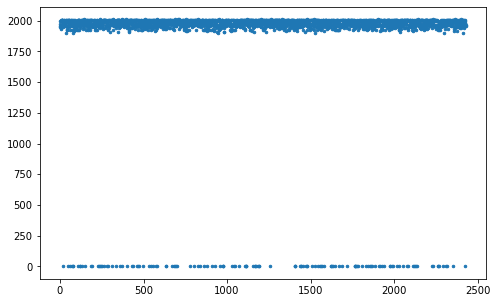

In [ ]:
train_df["Garage Yr Blt"].plot(
    marker=".",
    lw=0, 
    figsize=(8, 5),
    markersize=5,

);

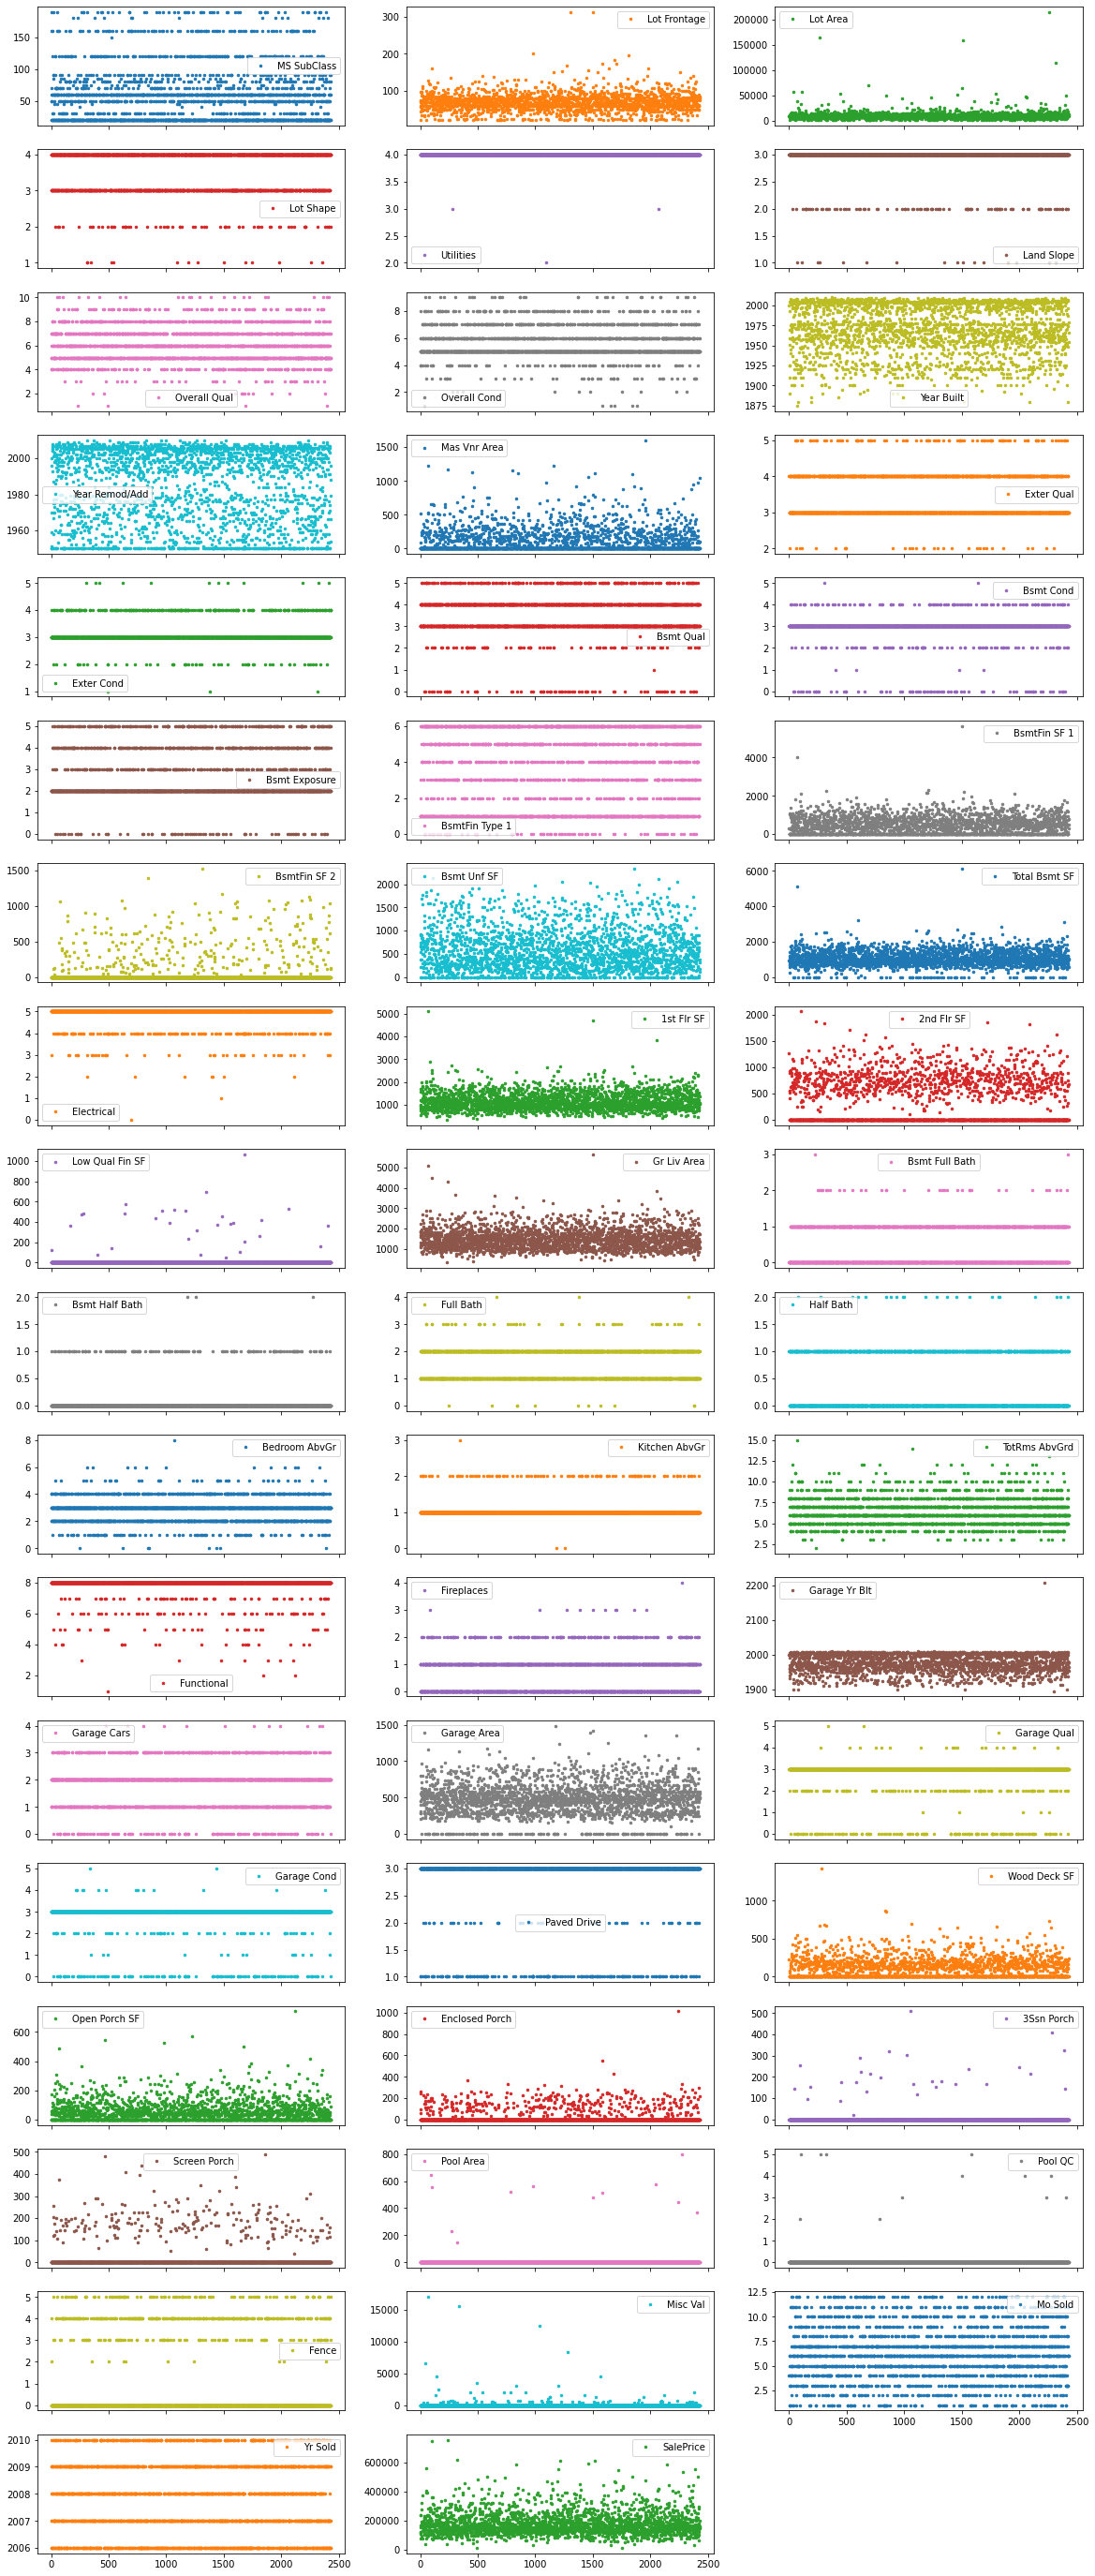

In [ ]:
# Plot all numerical values to check outliers
train_df.plot(
    subplots=True,
    marker=".",
    lw=0, 
    layout=(-1, 3),
    figsize=(20, 50),
    markersize=5,

);


Remove outlier according to the range set

In [ ]:
# Set range 
range_values = {
    "Lot Frontage": [200, 320],
    "Lot Area": [100000, 220000],
    "BsmtFin SF 1": [3000, 6000],
    "Enclosed Porch" : [600, 1200],
    "Wood Deck SF" : [1200, 1500],
    "Garage Yr Blt" : [2100, 2300],
} 

# Remove outlier according to the range set
for col in range_values:
    # Get range numbers
    num = range_values.get(col)
    # locate values that are in the range
    mask = train_df[col].between(num[0], num[1])
    # Drop values outide the sepecified range
    """ to remove!!!! """
    print(mask.loc[mask].shape) 
    train_df = train_df.drop(mask.loc[mask].index)
 

print("New tarin_df without outliers shape:", train_df.shape)


(3,)
(4,)
(1,)
(1,)
(1,)
(1,)
New tarin_df without outliers shape: (2419, 80)


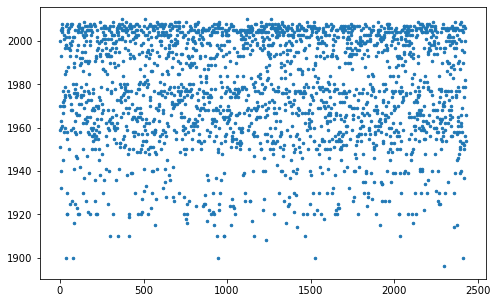

In [ ]:
train_df["Garage Yr Blt"].plot(
    marker=".",
    lw=0, 
    figsize=(8, 5),
    markersize=5,

);

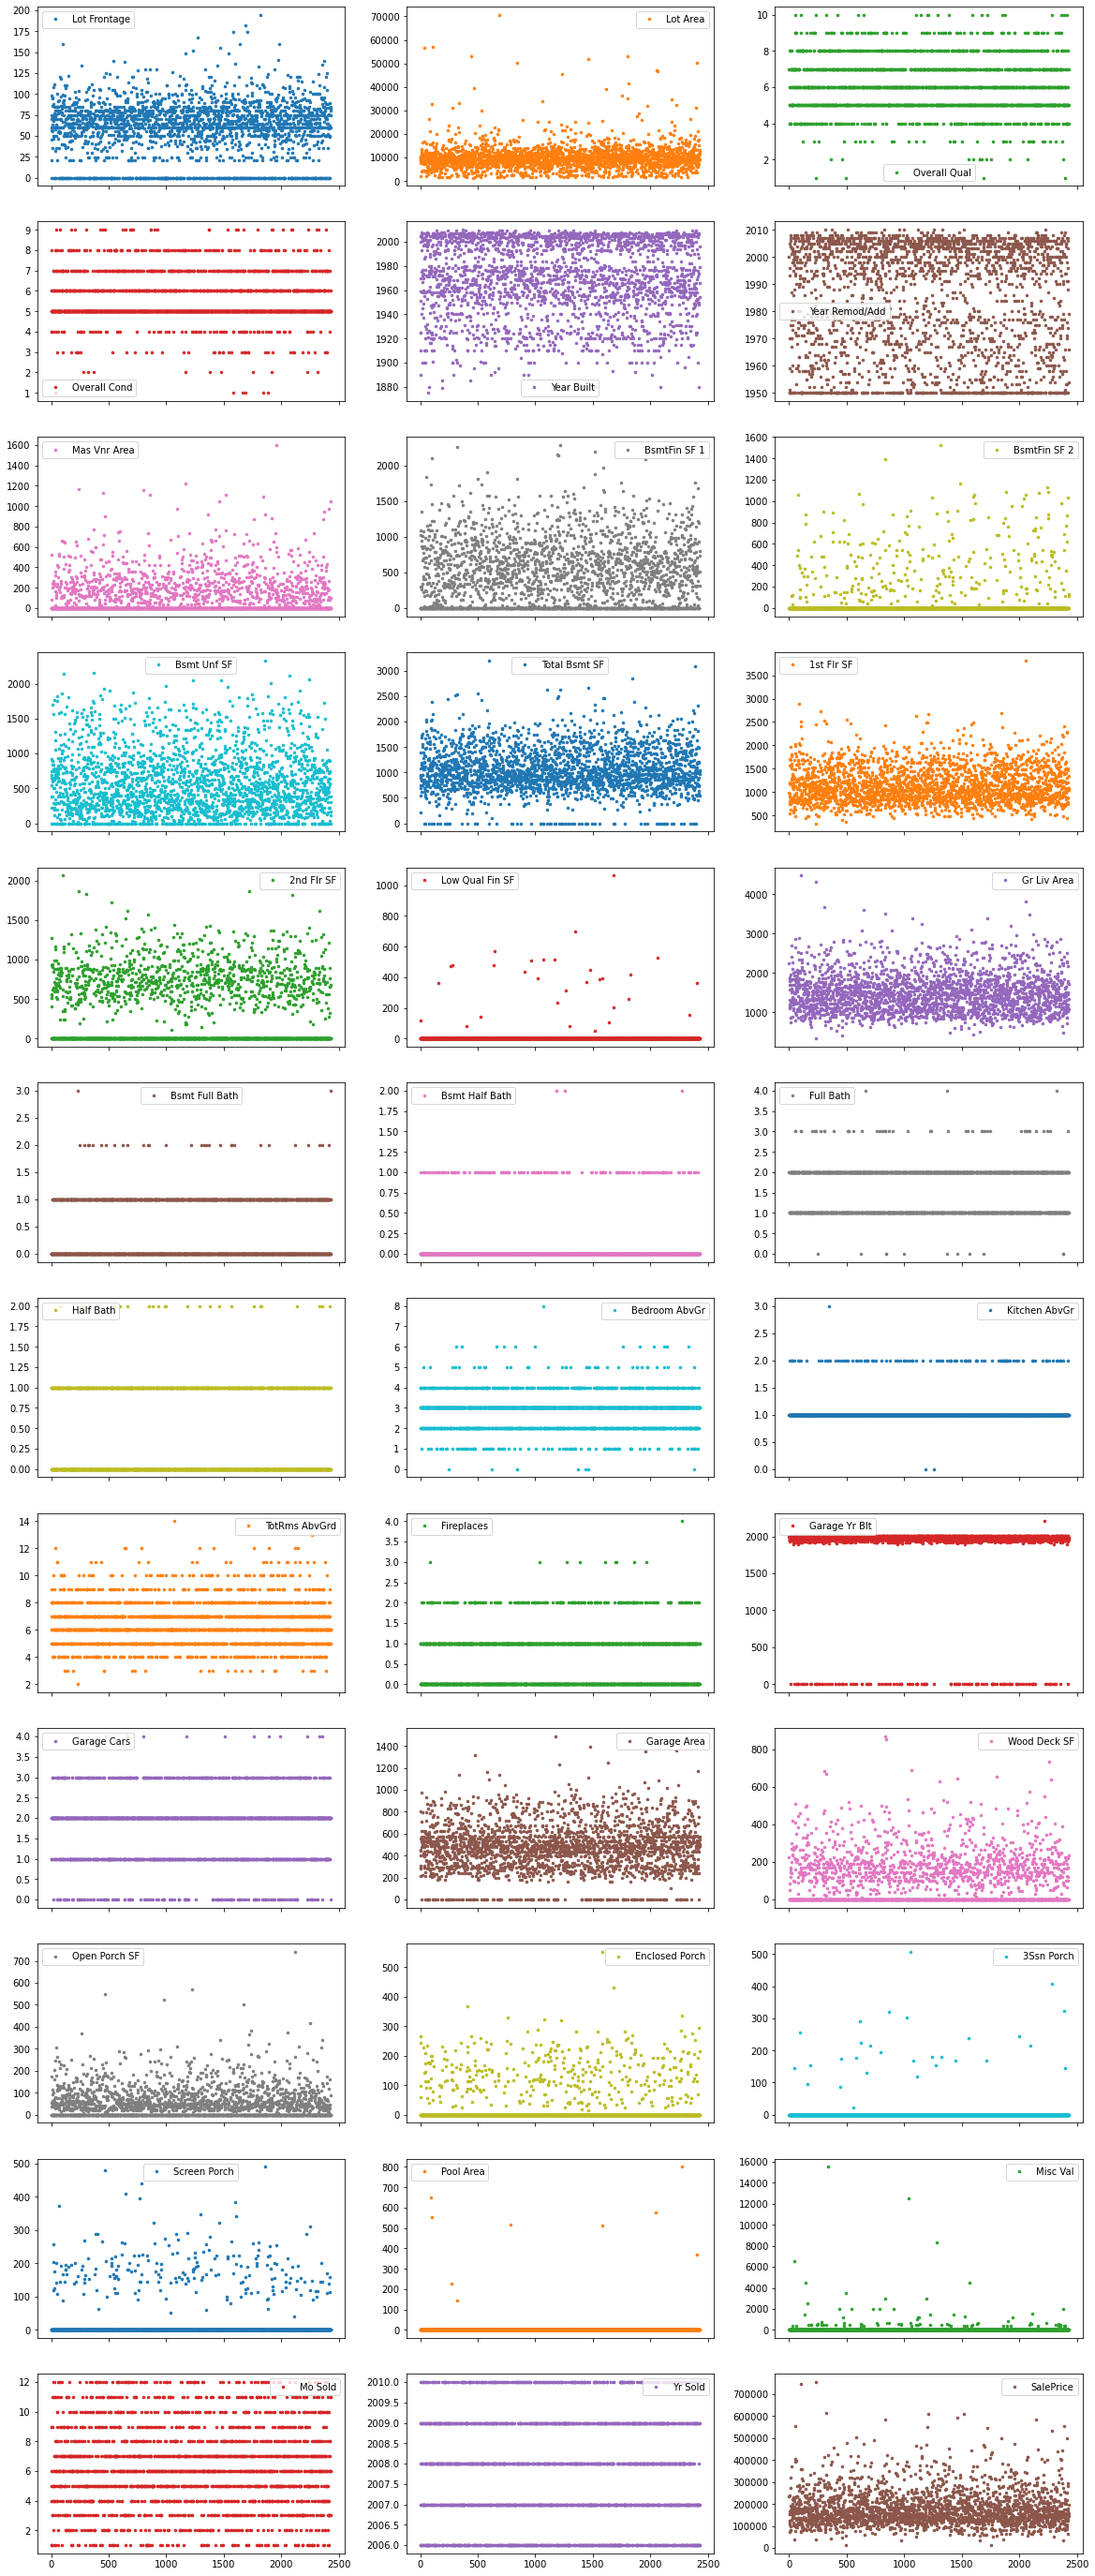

In [ ]:
# Plot all numerical values to check outliers
train_df.plot(
    subplots=True,
    marker=".",
    lw=0, 
    layout=(-1, 3),
    figsize=(20, 50),
    markersize=5,

);


Correcting inconsistencies in the variables by convert all the strings in a column to lowercase using the ``"str.lower()`` method:

In [ ]:
""" To check probably not necessary """
# Convert all string to lowercase
str_features = train_df.select_dtypes(exclude="number").columns

for col in str_features:
    train_df[col] = train_df[col].str.lower()

# Dispaly the change
train_df.select_dtypes(exclude="number").head()

MS SubClass MS Zoning Street    Alley Lot Shape Land Contour Utilities  \
0          60        rl   pave  missing       ir1          lvl    allpub   
1          20        rl   pave  missing       reg          lvl    allpub   
2         160        rm   pave  missing       reg          lvl    allpub   
3          20        rl   pave  missing       ir1          lvl    allpub   
4         190        rm   pave  missing       ir1          bnk    allpub   

  Lot Config Land Slope Neighborhood  ... Garage Type Garage Finish  \
0     inside        gtl      gilbert  ...     builtin           fin   
1     corner        gtl        names  ...      attchd           unf   
2     inside        gtl      meadowv  ...      attchd           unf   
3     inside        gtl        names  ...      attchd           rfn   
4     inside        gtl      oldtown  ...      detchd           unf   

  Garage Qual Garage Cond Paved Drive  Pool QC    Fence Misc Feature  \
0          ta          ta           y  missing  missing      missing   
1          ta          ta           y  missing  missing      missing   
2          ta          ta           y  missing  missing      missing   
3          ta          ta           y  missing  missing      missing   
4          ta          ta           n  missing    mnprv      missing   

  Sale Type Sale Condition  
0       wd          normal  
1       wd          normal  
2       wd          normal  
3       wd          normal  
4       wd          normal  

[5 rows x 44 columns]

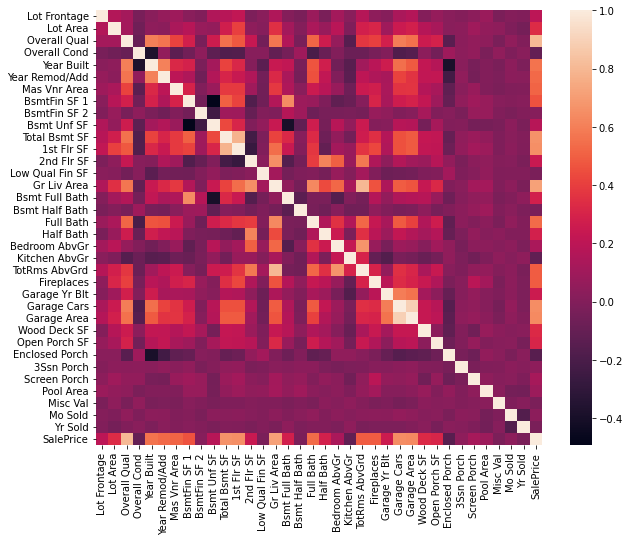

In [ ]:
""" To check probably not necessary """
import seaborn as sns
corr_matrix = train_df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.show()


In [ ]:
""" Checking collinearity """
""" To check probably not necessary """
features = train_df.drop(["SalePrice","1st Flr SF", "Total Bsmt SF"], axis=1).select_dtypes(include="number").columns

# Create input matrix with the additional column of ones
X = train_df[features].values
X1 = np.c_[np.ones(X.shape[0]), X]
# Compute rank and condition number
M = X1.shape[1]  # Number of columns
rank = np.linalg.matrix_rank(X1)
cond = np.linalg.cond(X1)
print("Columns {} rank {} collinear {}".format(M, rank, M - rank))
print("Condition number:", cond)
""" Condition number: too big! """

Columns 34 rank 34 collinear 0
Condition number: 18651904.069875337


' Condition number: too big! '

In [ ]:
""" Trying to find the collinear features to remove. It's not working very well """
def find_collinear_features(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    return to_drop

to_drop = find_collinear_features(train_df)
print(to_drop)
""" train_df = train_df.drop(to_drop, axis=1) """

['TotRms AbvGrd', 'Garage Area', 'SalePrice']


' train_df = train_df.drop(to_drop, axis=1) '

To identify incorrect and missing values in your data
---

Check for missing values: Look for missing values in the dataset and determine if they are missing at random or if they have a pattern. If they have a pattern, you can use imputation methods to fill in the missing values. If they are missing at random, you can simply delete the rows with missing values.

Check for inconsistencies: Check for inconsistencies in the data by comparing values for the same observation across different columns. For example, you may have a column for the year a house was built and another for the year it was sold. If the year of sale is before the year of construction, you know there is an error.

Check for outliers: Look for outliers in the dataset by plotting histograms, box plots or scatter plots. Outliers can have a big impact on your model's predictions, so you may want to remove them, replace them with the median or average value, or try to understand why they exist.

Check for incorrect data types: Make sure each column in the dataset has the correct data type. For example, if a column is supposed to contain only numerical values, make sure it doesn't contain any strings or other non-numerical values.

Check for duplicates: Look for duplicate rows in the dataset and remove them if necessary.

### Feature engineering
Your analysis should also include feature engineering. Here are a few ideas

- Create indicator variables ex. year of construction is older than some threshold
- Transformations ex. log-transforms, polynomials

Suggestion: write down your feature engineering ideas during the data exploration stage.


Suggestion:
---

- Creating a new binary or categorical variable that indicates the presence or absence of some characteristic. For example, creating a binary indicator for houses that are older than a certain age.

- Transforming the original features to create new, potentially more informative features. Common transformations include log-transforms, polynomials, square roots, and reciprocals. These can help improve the linearity of the relationship between the features and the target variable, making it easier for a model to learn the relationship.

- Grouping continuous variables into a smaller number of categories. This can help reduce the impact of outliers and improve the interpretability of the model.

- Creating new features that are the product or sum of two or more original features. Interactions can capture non-linear relationships between features and target variables, which might be missed by a linear model.

In [ ]:
""" To check probably not necessary """
# Create dummy variable to represent is a house old or not
threshold = train_df["Year Built"].median()
train_df["old_house"] = (train_df["Year Built"] < threshold).astype(int)

# Drop "Year Built"
tarin_df = train_df.drop("Year Built", axis=1)


The above code creates a new column ``"old_house"`` in the DataFrame, with the values 0 or 1, depending on whether the year of construction in the ``"Year Built"`` column is older or not older than the threshold. The ``astype(int)`` method is used to convert the values to integers.

# Plot all the data

In [ ]:
(train_df.iloc[:, :20]);

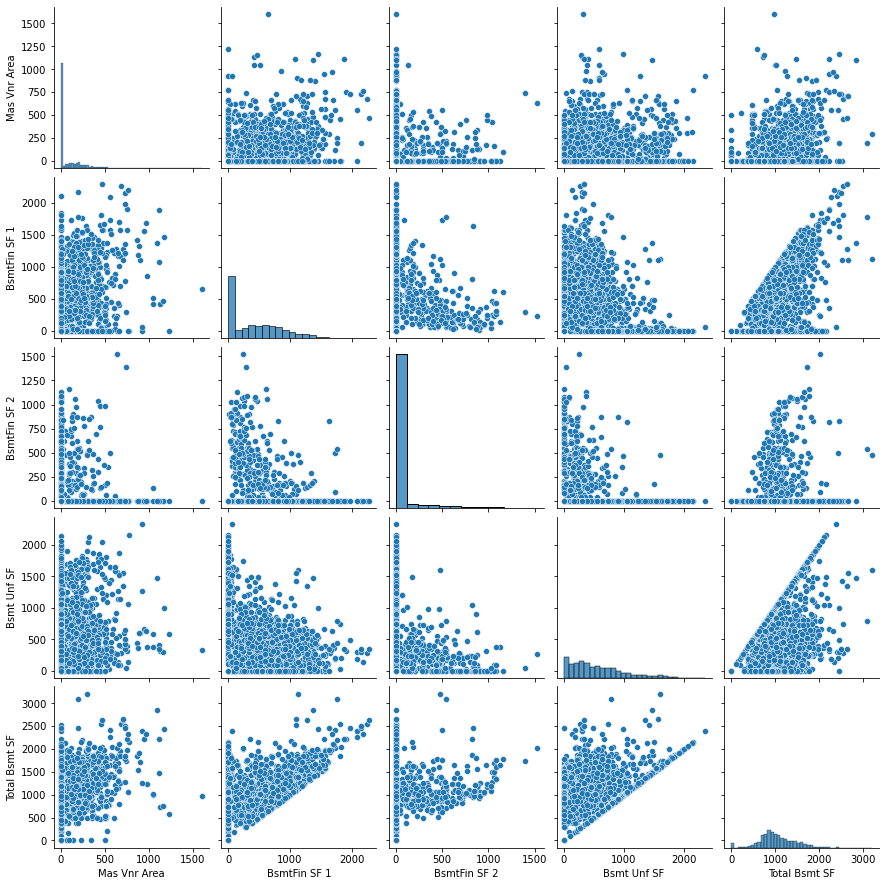

In [ ]:
sns.pairplot(train_df.iloc[:, 20:40]);

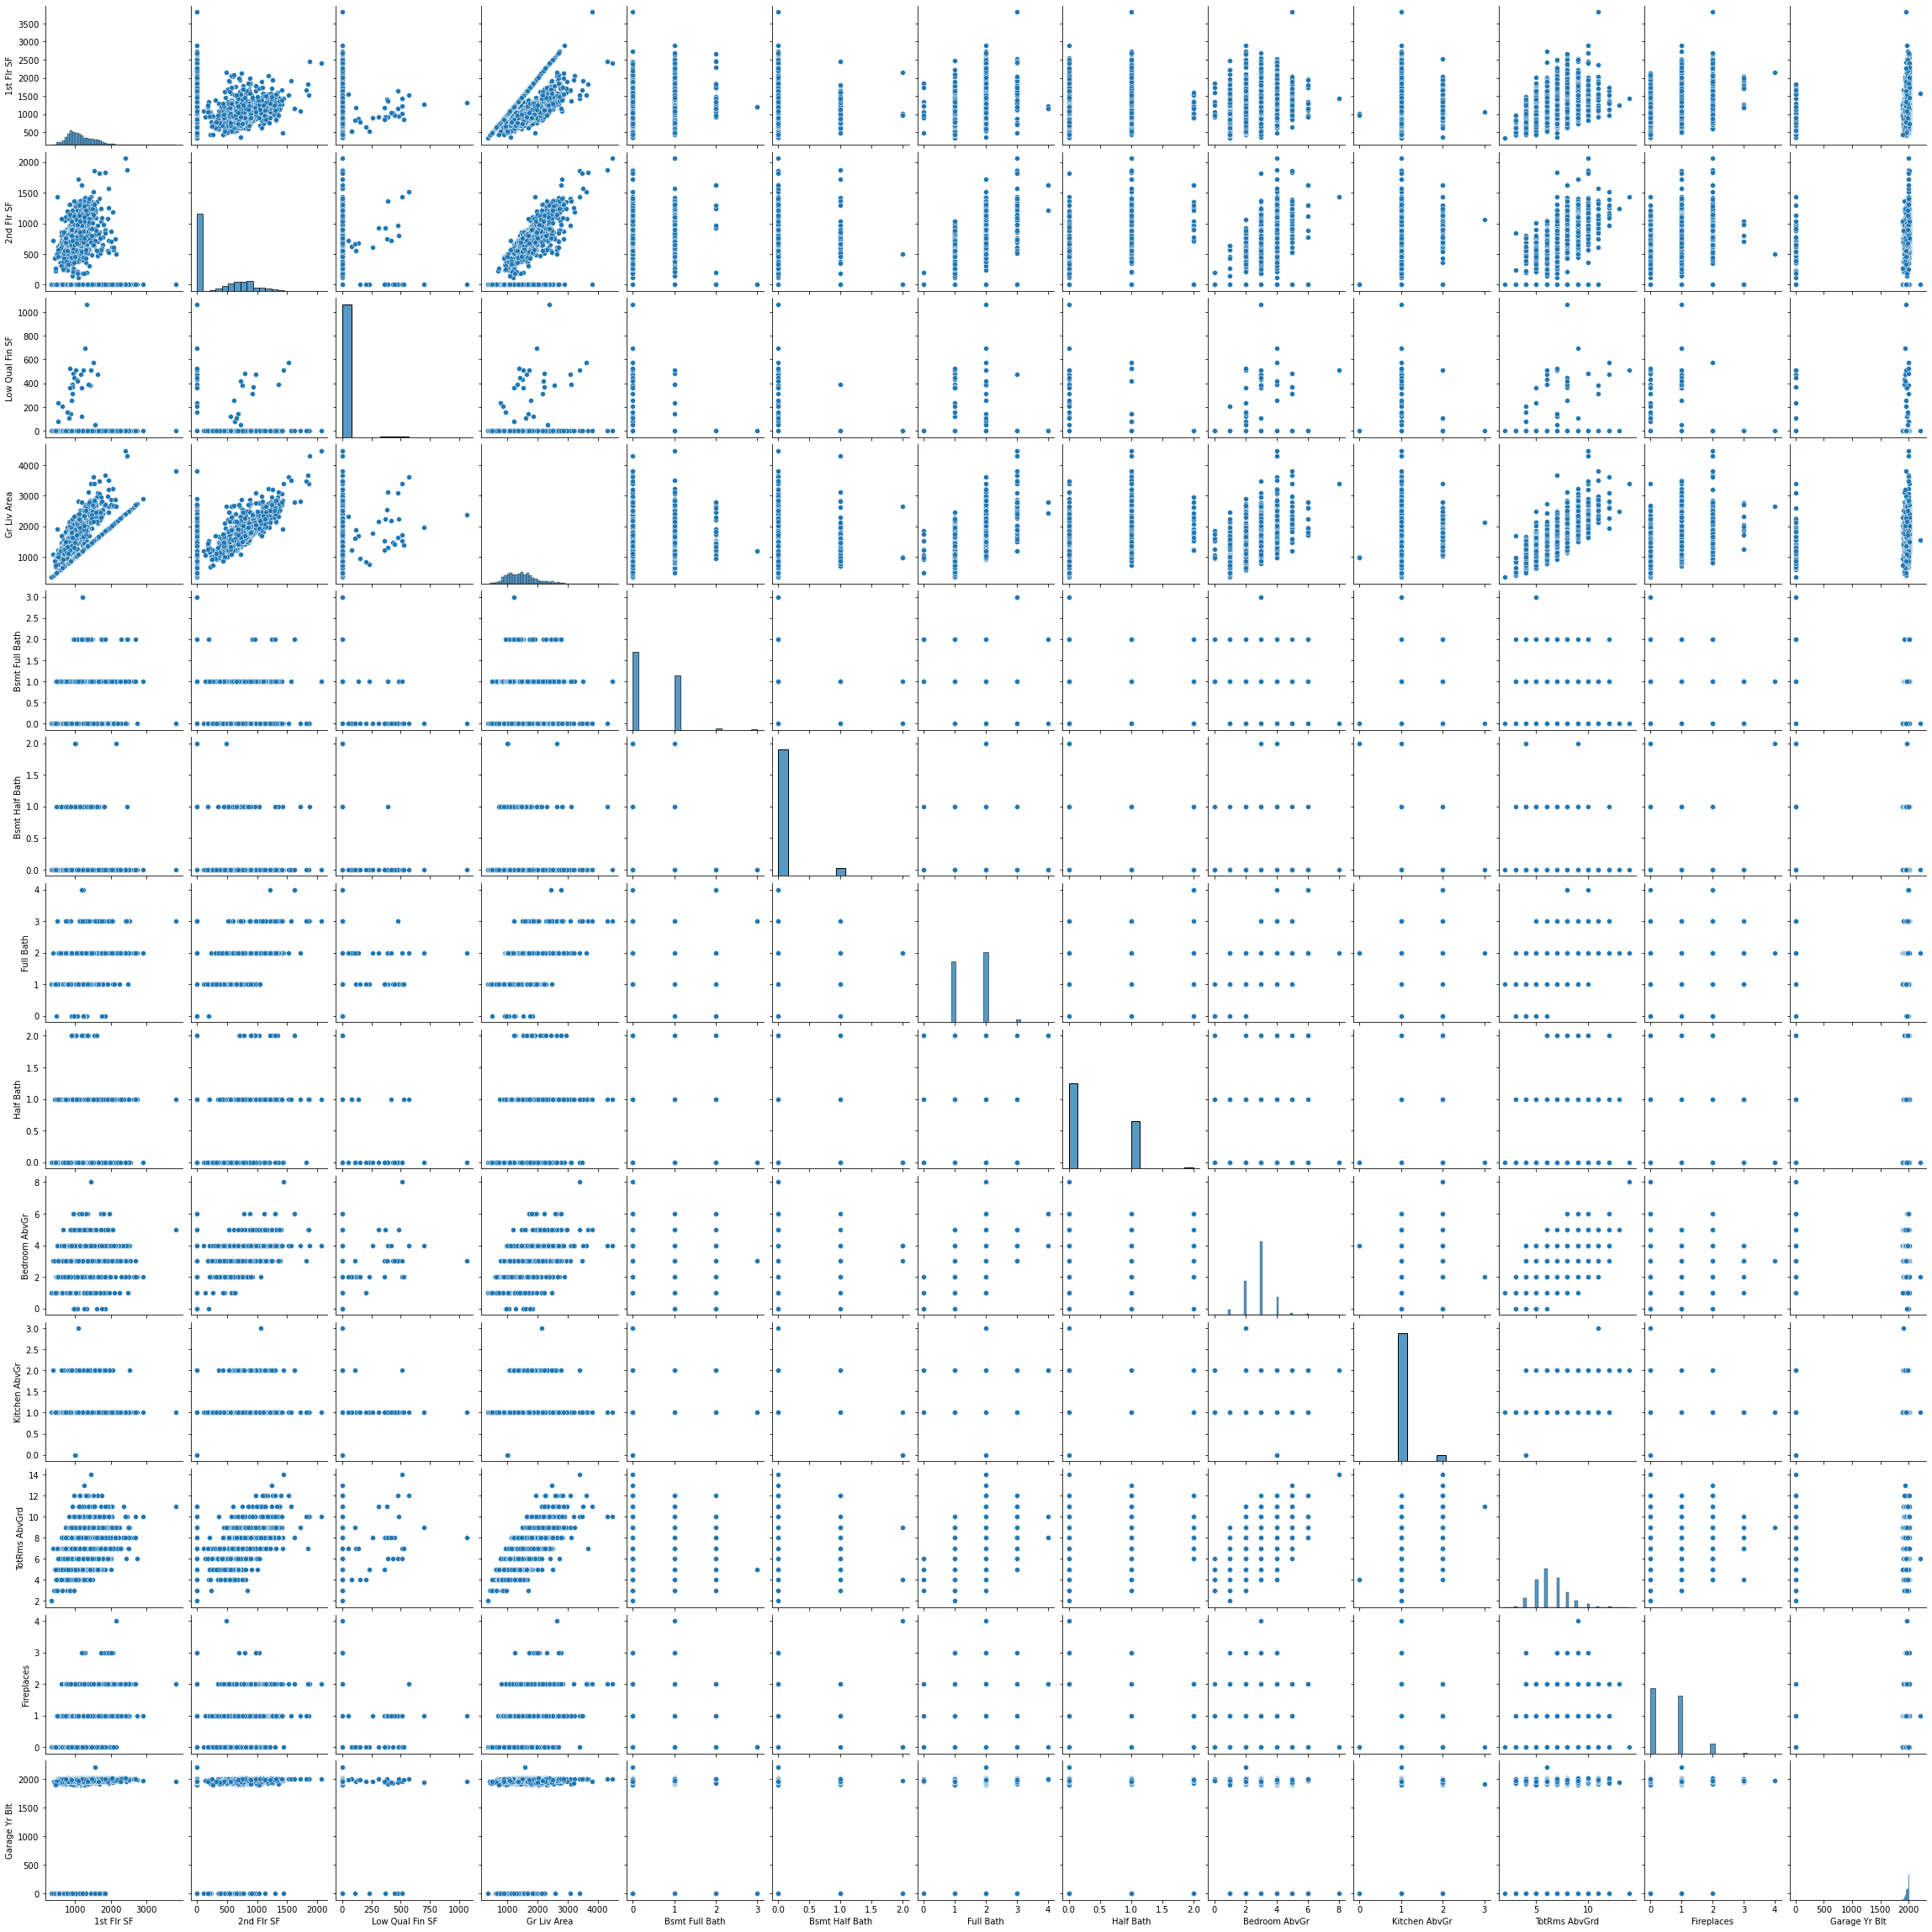

In [ ]:
sns.pairplot(train_df.iloc[:, 40:60]);

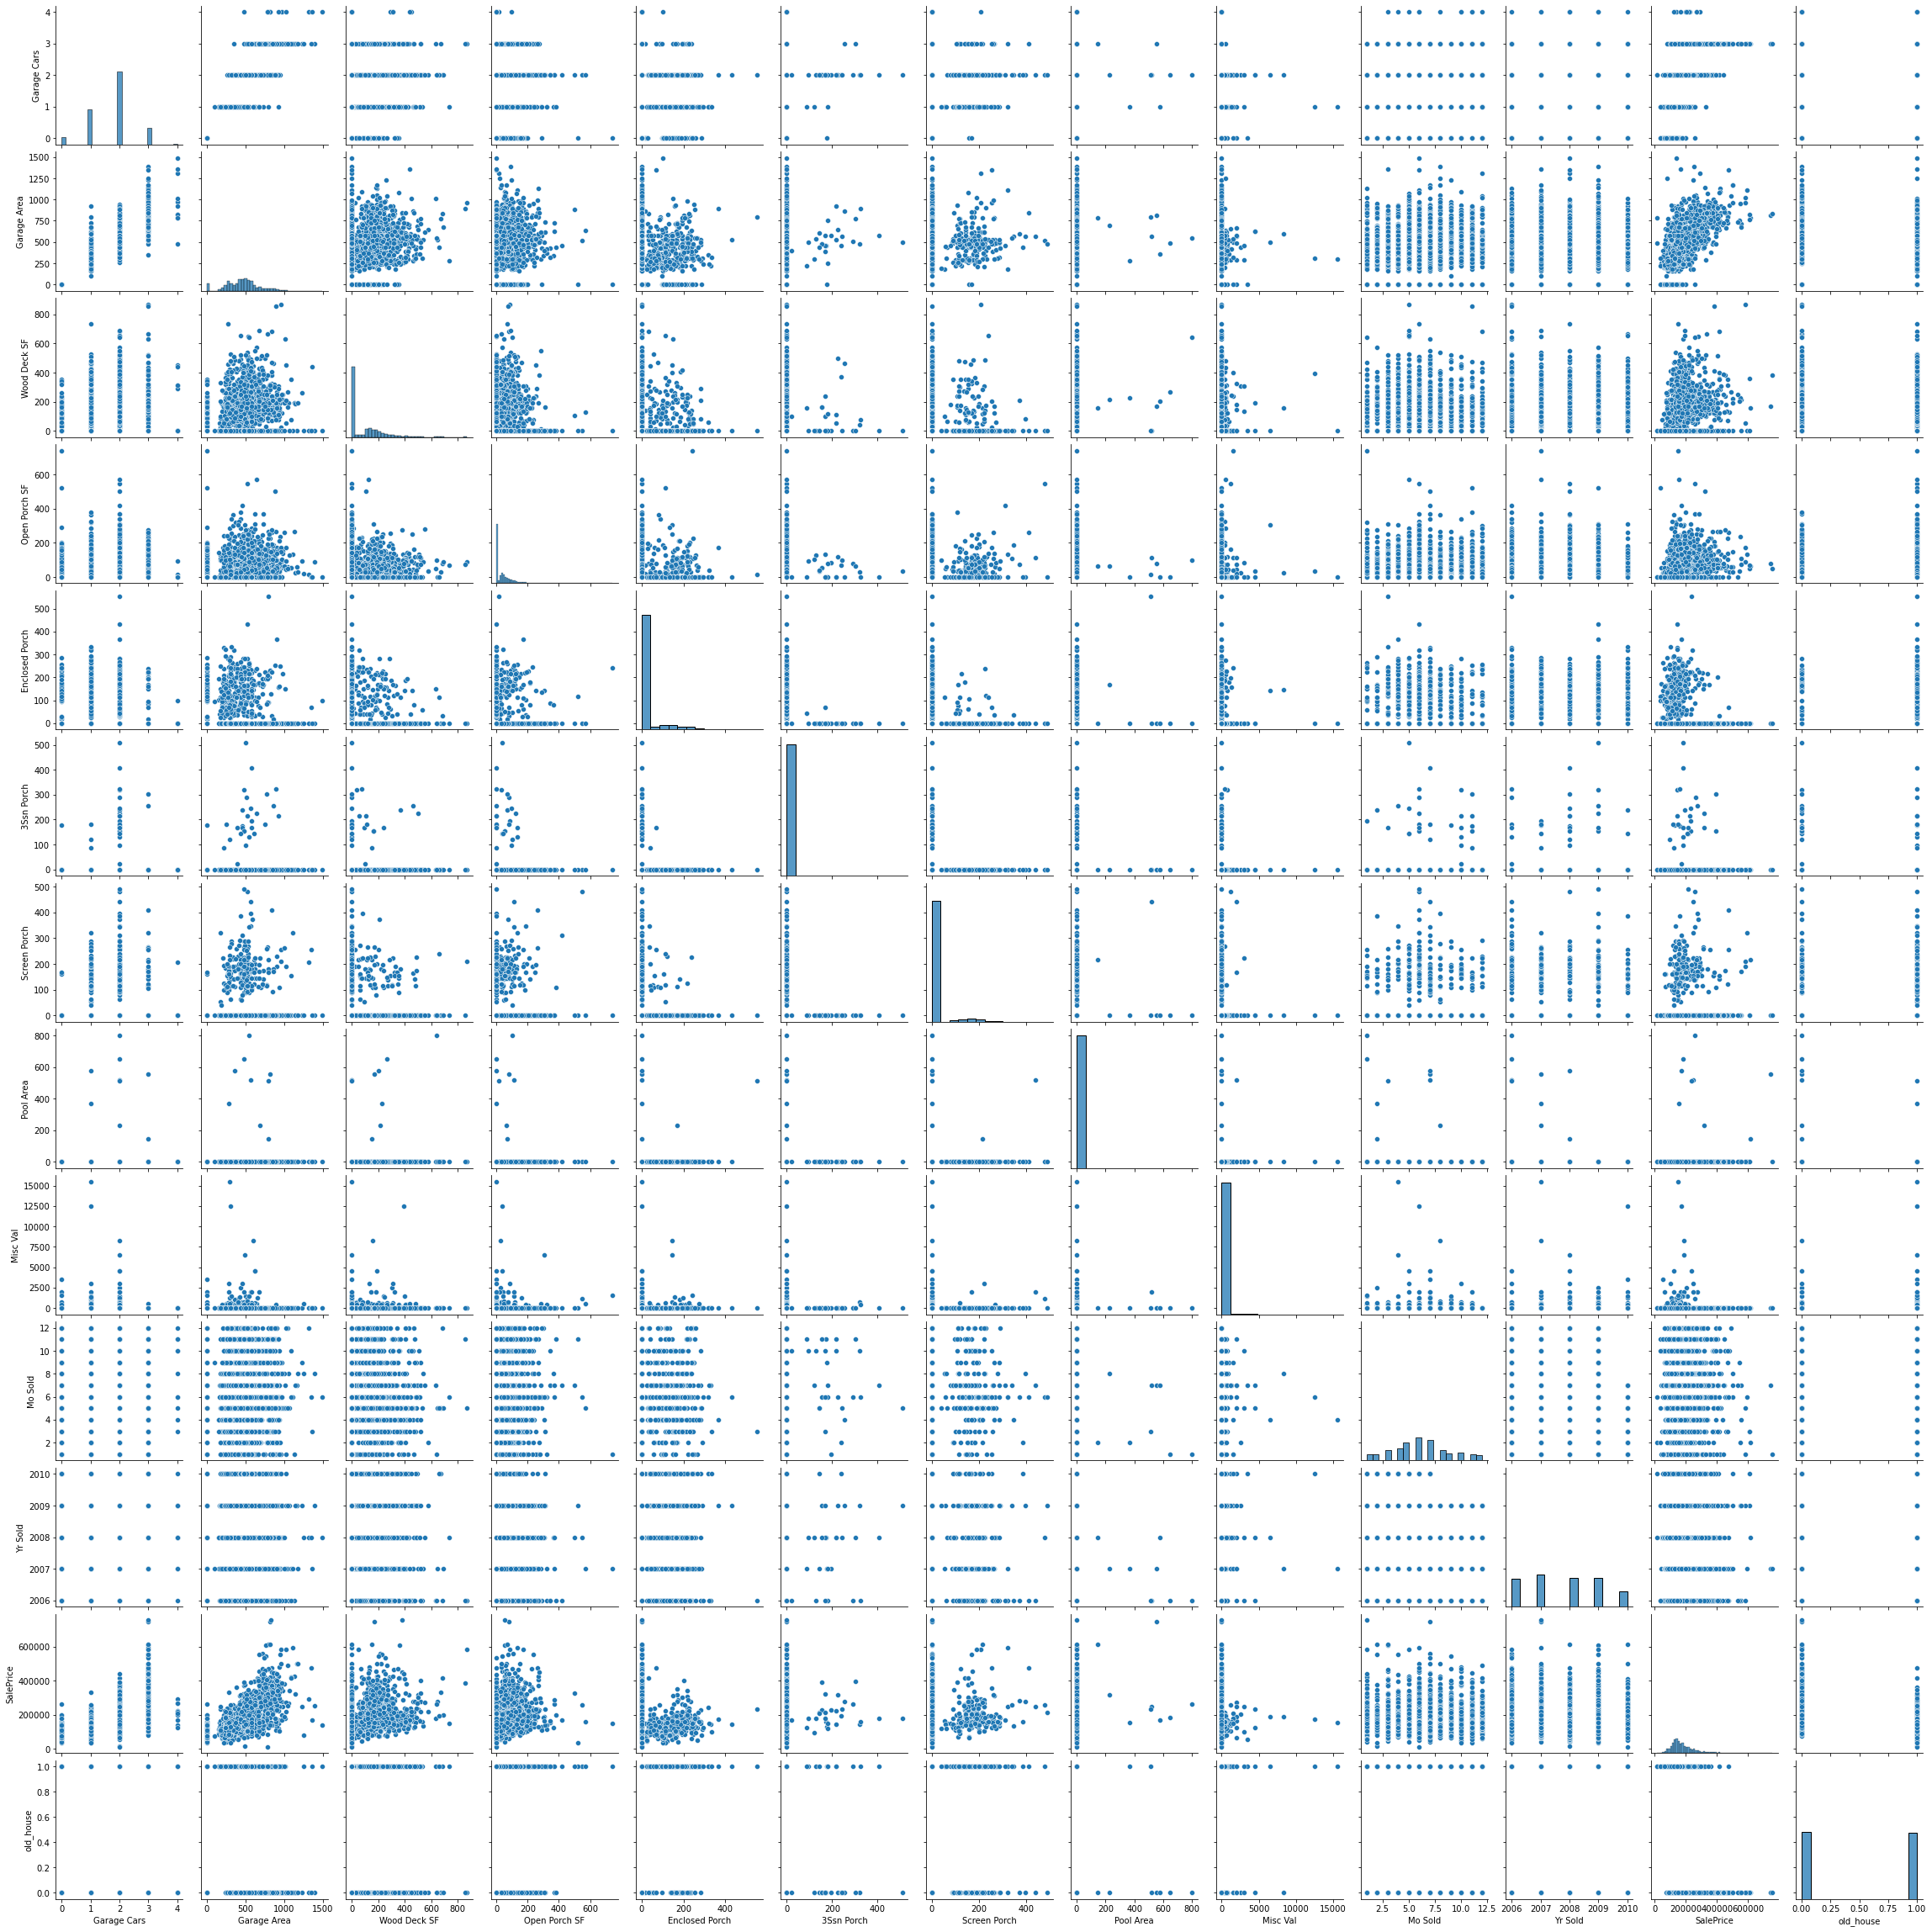

In [ ]:
sns.pairplot(train_df.iloc[:, 60:]);

### Feature encoding
Your analysis should include the necessary feature encoding steps. The documentation.txt file labels each variable with its type. For categorical ones, it uses the ordinal and nominal classification.

- Ordinal variables - you can order the categories
- Nominal variables - no possible ordering of the categories

The encoding depends on the type of variable and its meaning. For instance, the kitchen quality variable is on a scale from excellent to poor. Hence, it’s an ordinal variable, and you can choose to apply one-hot encoding or define a numerical scale ex. excellent corresponds to 5 and poor to 1. In any case, justify your choices!

# to read 
Encoding categorical variables is an important step in the data preprocessing pipeline.

For ordinal variables, you can encode the categories as numerical values that reflect the order of the categories. For example, if the kitchen quality variable has the categories "excellent", "good", "average", "fair", and "poor", you can assign numerical values to them such as 5 for "excellent", 4 for "good", 3 for "average", 2 for "fair", and 1 for "poor". This way, the encoding captures the ordinal relationship between the categories.

For nominal variables, there is no meaningful order between the categories. In this case, one-hot encoding is a common choice. One-hot encoding creates a binary column for each category and assigns a 1 or 0 to the columns based on the category of the original variable. For example, if the nominal variable has three categories "A", "B", and "C", the one-hot encoding would create three new binary columns "A", "B", and "C".

When choosing the encoding method, it's important to consider the meaning of the variable and the type of model you'll be using. For example, one-hot encoding is appropriate for nominal variables and decision tree-based models, but it can lead to sparse data and a large number of features for linear models. In such cases, a different encoding method like target encoding or ordinal encoding may be more suitable.

In summary, the choice of encoding method depends on the type of variable and its meaning, as well as the type of model you'll be using. Justifying your choices is important to ensure that your encoding is meaningful and suitable for your analysis.

In [ ]:
# One-hot encode
train_df = pd.get_dummies(train_df, drop_first=True)

Splitting data
---
You should split the data into training and validation sets (e.g. 60-40 split). You will use the training set for fitting the models and the validation set for evaluating the models and tuning hyperparameters.

In [ ]:
X = train_df.drop("SalePrice", axis=1)
y = train_df.SalePrice

# Spliting data
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.4, random_state=0)


# Compute baseline
baseline = y_val - np.median(y_val) 
""" Not sure of the formula to check!!!!! """


' Not sure of the formula to check!!!!! '

In [ ]:
""" to remove """
X_tr.iloc[:, :20]

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
1496          50.0      7030             4             6        1925   
2192           0.0     11885             8             5        2001   
1952          21.0      1526             4             8        1970   
414           60.0      6324             4             6        1927   
2251           0.0     14585             6             6        1960   
...            ...       ...           ...           ...         ...   
1037          81.0     14267             6             6        1958   
1738         119.0     10895             5             6        1955   
766            0.0      4538             9             5        2001   
838          114.0     17242             9             5        1993   
1660          60.0     11340             2             1        1920   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
1496            1950           0.0           0.0           0.0        641.0   
2192            2001         108.0         990.0           0.0        309.0   
1952            2002           0.0         515.0           0.0        115.0   
414             1950           0.0           0.0           0.0        520.0   
2251            1987          85.0         594.0         219.0        331.0   
...              ...           ...           ...           ...          ...   
1037            1958         108.0         923.0           0.0        406.0   
1738            1955           0.0         648.0           0.0        324.0   
766             2001         179.0        1004.0           0.0        306.0   
838             1994         738.0         292.0        1393.0         48.0   
1660            1950           0.0           0.0           0.0        723.0   

      Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
1496          641.0         641           0                0          641   
2192         1299.0        1299         573                0         1872   
1952          630.0         630           0                0          630   
414           520.0         520           0                0          520   
2251         1144.0        1429           0                0         1429   
...             ...         ...         ...              ...          ...   
1037         1329.0        1329           0                0         1329   
1738          972.0         972           0                0          972   
766          1310.0        1310           0                0         1310   
838          1733.0        1933        1567                0         3500   
1660          723.0         723         363                0         1086   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  
1496             0.0             0.0          1          0              2  
2192             1.0             0.0          2          1              3  
1952             1.0             0.0          1          0              1  
414              0.0             0.0          1          0              1  
2251             0.0             1.0          1          0              3  
...              ...             ...        ...        ...            ...  
1037             0.0             0.0          1          1              3  
1738             0.0             0.0          1          0              3  
766              1.0             0.0          1          1              1  
838              1.0             0.0          3          1              4  
1660             0.0             0.0          1          0              2  

[1452 rows x 20 columns]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Setup each regression
pipe_lr =  Pipeline([("scaler",StandardScaler()), ("lr", LinearRegression())])
ridge = Pipeline([("scaler",StandardScaler()), ("ridge", LinearRegression())])
pipe_lr2 = Pipeline([("scaler",StandardScaler()), ("coef", PolynomialFeatures()), ("lr", LinearRegression())])

# Fit 
pipe_lr.fit(X_tr, y_tr)
# taking a simple of first 20 features
ridge.fit(X_tr.iloc[:, :20], y_tr)
pipe_lr2.fit(X_tr, y_tr)

# Display the results
print("MAE for linear regression without ouliers: {:.3f}".format(MAE(y_val, pipe_lr.predict(X_val))))
print("MAE for Ridge regression without ouliers: {:.3f}".format(MAE(y_val, ridge.predict(X_val.iloc[:, :20]))))
print("MAE for linear regression with ouliers: {:.3f}".format(MAE(y_val, pipe_lr2.predict(X_val))))

MAE for linear regression without ouliers: 101972840032807.125
MAE for Ridge regression without ouliers: 20290.485
MAE for linear regression with ouliers: 23940.863


In [ ]:
# check code for random selection

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# check code below

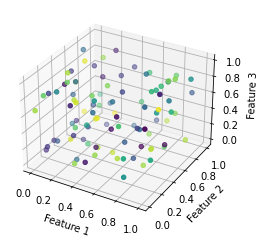

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
X = np.random.rand(100, 3)
y = np.random.rand(100)

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()